# Northern GOM CO2 Storage Capacity Data Analytics Project (Pleistocene, Pliocene and Miocene and before OIL and GAS Reservoirs) - BOEM database version


In this project, we apply data analytics methods to assess the storage capacity of each field in GOM and rank the influencing factors

## Data Entry Explanation:


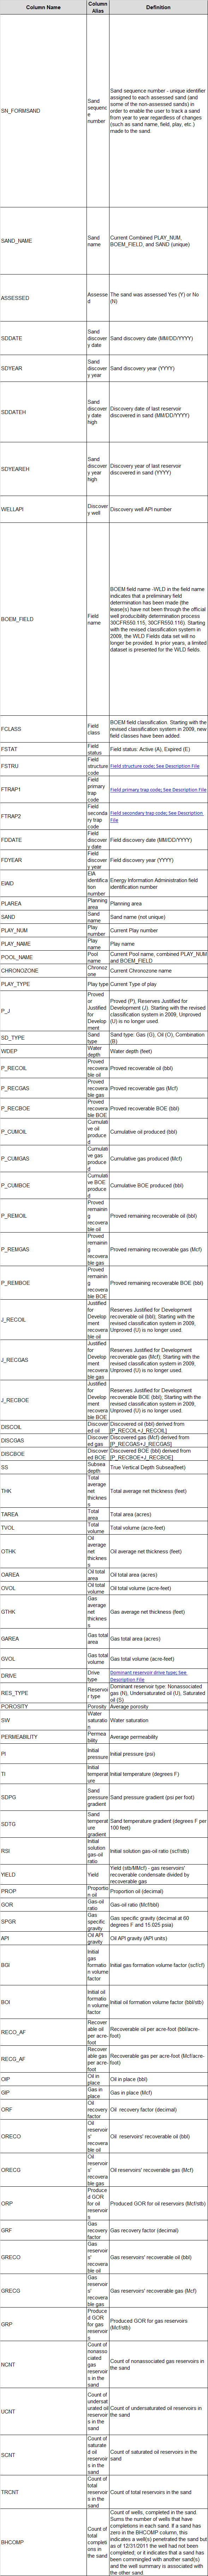

## Abbreviations


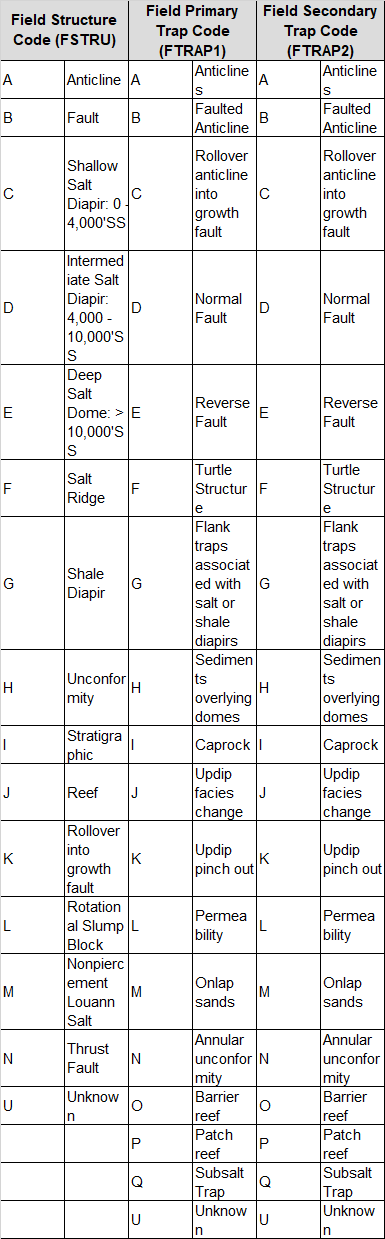

BOEM_CHRONOZONE	CHRONOZONE_DESCRIPTION
PLU	Upper Pleistocene
PLM	Middle Pleistocene
PLL	Lower Pleistocene
PU	Upper Pliocene
PL	Lower Pliocene
MUU	Upper Upper Miocene
MLU	Lower Upper Miocene
MUM	Upper Middle Miocene
MMM	Middle Middle Miocene
MLM	Lower Middle Miocene
MUL	Upper Lower Miocene
MML	Middle Lower Miocene
MLL	Lower Lower Miocene
OU	Upper Oligocene
OL	Lower Oligocene
EU	Upper Eocene
EM	Middle Eocene
EL	Lower Eocene
LU	Upper Paleocene
LL	Lower Paleocene
KUU	Upper Upper Cretaceous
KLU	Lower Upper Cretaceous
KUL	Upper Lower Cretaceous
KML	Middle Lower Cretaceous
KLL	Lower Lower Cretaceous
JU	Upper Jurassic
JM	Middle Jurassic
JL	Lower Jurassic
TRU	Upper Triassic
TRM	Middle Triassic
TRL	Lower Triassic
MML-OU	05_Lower Miocene to Upper Oligocene
PLU-LL	01_Cenozoic
KLU-KLL	15_Cretaceous
PU-PL	02_Upper to Middle Pliocene
EL-LU	09_Lower Eocene to Upper Paleocene
OU-LL	06_Lower Tertiary
OL-LL	07_Lower Tertiary
EL-LL	10_Lower Eocene to Paleocene
KUU-KLL	12_Cretaceous
KUU-JU	13_Cretaceous to Upper Jurassic
KUU-TRL	14_Mesozoic
KUL-KLL	16_Lower Cretaceous
KUL-JU	17_Lower Cretaceous to Upper Jurassic
KLL-JU	18_Lower Cretaceous to Upper Jurassic
JU-JM	19_Jurassic
EU-LL	08_Eocene to Paleocene
MUM-MMM	04_Middle Miocene
MUU-MMM	03_Upper to Middle Miocene
LU-LL	11_Paleocene


# Part 0: Load Data and Setup Environment

In [1]:
!pip install graphviz
!pip install pydotplus
!pip install sklearn
!pip install six
!pip install mitdeeplearning
!pip install scikeras


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from matplotlib import gridspec
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import Model
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras import layers
from keras import optimizers
from tensorflow.keras.layers import Dense
from scipy.integrate import trapz

In [3]:
# LOAD BOEM database
df = pd.read_excel('2018_BOEM.XLSX')
df.head(5)


PermissionError: [Errno 13] Permission denied: '2018_BOEM.XLSX'

In [ ]:
matplotlib.rc_file_defaults()

# Part 1: Data Exploration 

### Part 1.1: Understand the Raw Dataset

In [ ]:
ISG_df = df.copy()

In [ ]:
ISG_df.head()

In [ ]:
# check data info
ISG_df.info()

In [ ]:

ax0=sns.histplot(data=ISG_df, x='SDYEAR')
ax1=ax0.twinx()
sns.ecdfplot(data=ISG_df, x='SDYEAR',color='r')

In [ ]:
#We don't need playcode, fieldcode, discovery year, lease
ISG_df.drop(['SN_FORMSAND','SAND_NAME','ASSESSED','SDDATE','SDYEAR','SDDATEH','SDYEARH','FCLASS',
             'FSTAT','FTRAP2','FDDATE','FDYEAR','EIAID','PLAREA','PLAY_NUM','PLAY_NAME','POOL_NAME','PLAY_TYPE',
             'OVOL','GVOL','RESTYP','PROP','RECO_AF','RECG_AF','ORECO','ORECG','ORP','GRECO','GRECG','GRP','NCNT','UCNT','SCNT','TCNT'],inplace=True,axis=1)


In [ ]:
# check data info
ISG_df.describe()

### Explore Categorical Data



In [ ]:
#drop non and reset index
ISG_df_hasdata = ISG_df.dropna(how='any')
ISG_df_hasdata=ISG_df_hasdata.loc[(ISG_df_hasdata.GRF<=1) & (ISG_df_hasdata.ORF<=1)]
ISG_df_hasdata.reset_index(drop=True,inplace=True)


In [ ]:
#add geo age # OTHER contains OU:upper Oligocene, KUL: Upper lower cretaceous, KLL: Lower lower cretaceous, JU-JM: Jurassic
ISG_df_hasdata['GEO_AGE'] = 'OTHER'
ISG_df_hasdata['GEO_AGE_Detail'] = 'OTHER'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('MU')]='Miocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('MM')]='Miocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('ML')]='Miocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('MU')]='Upper Miocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('MM')]='Middle Miocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('ML')]='Lower Miocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLU')]='Pleistocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLM')]='Pleistocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLL')]='Pleistocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLU')]='Upper Pleistocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLM')]='Middle Pleistocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE.str.contains('PLL')]='Lower Pleistocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE==('PU')]='Pliocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE==('PL')]='Pliocene'
ISG_df_hasdata.GEO_AGE.loc[ISG_df_hasdata.CHRONOZONE==('PU-PL')]='Pliocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE==('PU')]='Upper Pliocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE==('PL')]='Lower Pliocene'
ISG_df_hasdata.GEO_AGE_Detail.loc[ISG_df_hasdata.CHRONOZONE==('PU-PL')]='Middle Pliocene'

#convert full name to letter labels
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Anticline')]='A'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Fault')]='B'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==("Shallow Salt Diapir: 0 - 4,000'SS")]='C'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==("Intermediate Salt Diapir: 4,000 - 10,000'SS")]='D'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==("Deep Salt Dome: > 10,000'SS")]='E'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Salt Ridge')]='F'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Shale Diapir')]='G'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Unconformity')]='H'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Stratigraphic')]='I'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Rollover into growth fault')]='K'

#Other contains <100 numbers
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Nonpiercement Louann Salt')]='OTHER'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Thrust Fault')]='OTHER'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Rotational Slump Block')]='OTHER'
ISG_df_hasdata.FSTRUC.loc[ISG_df_hasdata.FSTRUC==('Reef')]='OTHER'
#Other contains ~<10 numbers
ISG_df_hasdata.FTRAP1.loc[ISG_df_hasdata.FTRAP1==('O')]='OTHER'
ISG_df_hasdata.FTRAP1.loc[ISG_df_hasdata.FTRAP1==('P')]='OTHER'
ISG_df_hasdata.FTRAP1.loc[ISG_df_hasdata.FTRAP1==('M')]='OTHER'
ISG_df_hasdata.FTRAP1.loc[ISG_df_hasdata.FTRAP1==('U')]='OTHER'

#Reorder the entries based on geo age
ISG_df_1 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Upper Pleistocene']
ISG_df_2 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Middle Pleistocene']
ISG_df_3 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Lower Pleistocene']
ISG_df_4 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Upper Pliocene']
ISG_df_5 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Middle Pliocene']
ISG_df_6 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Lower Pliocene']
ISG_df_7 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Upper Miocene']
ISG_df_8 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Middle Miocene']
ISG_df_9 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'Lower Miocene']
ISG_df_10 = ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE_Detail == 'OTHER']
ISG_df_hasdata = pd.concat([ISG_df_1,ISG_df_2,ISG_df_3,ISG_df_4,ISG_df_5,ISG_df_6,ISG_df_7,ISG_df_8,ISG_df_9,ISG_df_10])
ISG_df_hasdata.reset_index(drop=True,inplace=True)

In [ ]:
ISG_df_hasdata.info()

In [ ]:
g=sns.histplot(x='CHRONOZONE',hue='CHRONOZONE',data=ISG_df_hasdata)

g.set(yscale='log')
plt.legend( loc='upper left', borderaxespad=0)

In [ ]:
_,axss = plt.subplots(2,2, figsize=[20,10])

g0=sns.histplot(x='GEO_AGE',hue='GEO_AGE',data=ISG_df_hasdata,ax=axss[0][0])
for container in axss[0][0].containers:
    axss[0][0].bar_label(container)
g00=sns.histplot(x='GEO_AGE',data=ISG_df_hasdata,ax=axss[0][0].twinx(),stat='percent')
g0.grid(False)
g1=sns.histplot(x='FSTRUC',hue='FSTRUC',data=ISG_df_hasdata,ax=axss[0][1])
g11=sns.histplot(x='FSTRUC',data=ISG_df_hasdata,ax=axss[0][1].twinx(),stat='percent')
g1.grid(False)
plt.text('A',0,'''
A	Anticline
B	Fault
C	Shallow Salt Diapir: 0 - 4,000'SS
D	Intermediate Salt Diapir: 4,000 - 10,000'SS
E	Deep Salt Dome: > 10,000'SS
F	Salt Ridge
G	Shale Diapir
H	Unconformity
I	Stratigraphic
J	Reef
K	Rollover into growth fault
L	Rotational Slump Block
M	Nonpiercement Louann Salt
N	Thrust Fault
U	Unknown
''')
g1.set(xlabel='Field Structure')
g2=sns.histplot(x='FTRAP1',hue='FTRAP1',data=ISG_df_hasdata,ax=axss[1][0])

g22=sns.histplot(x='FTRAP1',data=ISG_df_hasdata,ax=axss[1][0].twinx(),stat='percent')
plt.text('G',0,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
E	Reverse Fault
F	Turtle Structure
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
I	Caprock
J	Updip facies change
K	Updip pinch out
L	Permeability
M	Onlap sands
N	Annular unconformity
O	Barrier reef
P	Patch reef
Q	Subsalt Trap
U	Unknown
''')
g2.set(xlabel='Primary Trap Type')
g2.grid(False)
g3=sns.histplot(x='SD_TYPE',hue='SD_TYPE',data=ISG_df_hasdata,ax=axss[1][1])
g33=sns.histplot(x='SD_TYPE',data=ISG_df_hasdata,ax=axss[1][1].twinx(),stat='percent')
g3.grid(False)
plt.show()

# Part 2: Data wrangling and check relationship behind the dataset

## Label data via added column
### Volume unit MMSCF
### Here we used the method from DOE-NETL, 2015 "https://www.netl.doe.gov/research/coal/carbonstorage/atlasv" to calculate depleted volumes of gas/oil that can be used for CO2 storage
### Vol_CO2 = A*h*phi*(1-Sw)*B*rho_CO2*E_og, where E_og is fx of recovery factor given by Agartan et al. 2018 "https://www.sciencedirect.com/science/article/pii/S1750583617308666?via%3Dihub"
### Formation factor B is calculated by Hassanzadeh et al. 2008 "https://www.sciencedirect.com/science/article/pii/S1750583607000102"

In [ ]:

ISG_df_hasdata.rename(columns={'Pi':'PI'},inplace=True)
B = 18256*ISG_df_hasdata['TI']**(-0.738)*ISG_df_hasdata['PI']**(0.0713*np.log((ISG_df_hasdata['TI']-130)/300)-0.9968)

#Correlate Capacity with equation
HCRF = (ISG_df_hasdata['Recoverable Gas']+ISG_df_hasdata['Recoverable Oil']*5.615)/(ISG_df_hasdata['GIP']+ISG_df_hasdata['OIP']*5.615)
# volume unit MM SCF
ISG_df_hasdata['Max_Vol'] = ISG_df_hasdata['THK']*ISG_df_hasdata['TAREA']*43560.17*ISG_df_hasdata['POROSITY']*(1-ISG_df_hasdata['SW'])*HCRF/1000000
#ISG_df_hasdata['Max_Vol'] = ISG_df_hasdata['THK']*ISG_df_hasdata['TAREA']*43560.17*ISG_df_hasdata['POROSITY']*(1-ISG_df_hasdata['SW'])*1/B/10**6

In [ ]:
g=sns.scatterplot(x='SS',y='Max_Vol',data=ISG_df_hasdata)
g.set(ylabel='Depleted Volume, MM SCF',xlabel='TVD, ft')
g.set_yscale('log')

In [ ]:
# Next we check the trap type distributions

ax=sns.histplot(x='FSTRUC',data=ISG_df_hasdata,stat='count',hue='GEO_AGE',element='bars',multiple='stack',legend=True)
for container in ax.containers:
    ax.bar_label(container)
plt.text('L',500,'''
A	Anticline
B	Fault
C	Shallow Salt Diapir: 0 - 4,000'SS
D	Intermediate Salt Diapir: 4,000 - 10,000'SS
E	Deep Salt Dome: > 10,000'SS
F	Salt Ridge
G	Shale Diapir
H	Unconformity
I	Stratigraphic
J	Reef
K	Rollover into growth fault
L	Rotational Slump Block
M	Nonpiercement Louann Salt
N	Thrust Fault
U	Unknown
''')
ax.set(xlabel='Field Structure')

In [ ]:

ax=sns.histplot(x='FTRAP1',data=ISG_df_hasdata,stat='count',hue='GEO_AGE',element='bars',multiple='stack',legend=True)
for container in ax.containers:
    ax.bar_label(container)
plt.text('L',500,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
E	Reverse Fault
F	Turtle Structure
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
I	Caprock
J	Updip facies change
K	Updip pinch out
L	Permeability
M	Onlap sands
N	Annular unconformity
O	Barrier reef
P	Patch reef
Q	Subsalt Trap
U	Unknown
''')
ax.set(xlabel='Primary Trap Type')


In [ ]:
_,ax1 = plt.subplots()
g=sns.histplot(x='Max_Vol',hue='GEO_AGE',data=ISG_df_hasdata,stat='count',binwidth=500,ax=ax1)
axss=ax1.twinx()
g1=sns.ecdfplot(x='Max_Vol',data=ISG_df_hasdata,stat='count',ax=axss)
g1.grid(False)
g.set_xlabel('Depleted Volume, MM SCF')
g.set_yscale('log')

plt.show()

### Overburden pressure gredient based on https://www.sciencedirect.com/topics/engineering/fracture-gradient fig. 3.5

In [ ]:
# Reduce shallow depth and overburden reservoirs
PG=0.6049*ISG_df_hasdata.SS**0.0493
ISG_df_hasdata['CAND']='Candidate'
ISG_df_Candidate=ISG_df_hasdata.loc[ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG]
ISG_df_OB=ISG_df_hasdata.loc[ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG]
ISG_df_hasdata['CAND'].loc[ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG] = 'OB'
ISG_df_hasdata['CAND'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG) & (ISG_df_hasdata.PI<=1070)] = 'OB and Not SC'
ISG_df_hasdata['CAND'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG) & (ISG_df_hasdata.TI<=87.8)] = 'OB and Not SC'
ISG_df_hasdata['CAND'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG) & (ISG_df_hasdata.PI<=1070)] = 'Not SC'
ISG_df_hasdata['CAND'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG) & (ISG_df_hasdata.TI<=87.8)] = 'Not SC'

ISG_df_Shallow1=ISG_df_hasdata.loc[ISG_df_hasdata.PI<=1070]
ISG_df_Shallow2=ISG_df_hasdata.loc[ISG_df_hasdata.TI<=87.8]

ISG_df_Candidate=ISG_df_Candidate.loc[ISG_df_Candidate.PI>1070]
ISG_df_Candidate=ISG_df_Candidate.loc[ISG_df_Candidate.TI>87.8]


ISG_df_Shallow=pd.concat([ISG_df_Shallow1,ISG_df_Shallow2], ignore_index=True)
ISG_df_Shallow.drop_duplicates(inplace=True)


### Overburden pressure based on constant value 0.465, fracture 0.926 psi/ft, fig. 10 in https://pubs.usgs.gov/sir/2011/5083/sir2011-5083.pdf

In [ ]:
# Label underpressure, overpressure, fracking pressure
PG1=0.5
PG2=0.926
ISG_df_hasdata['DP_REGION']='Underpressure'
ISG_df_underpressure=ISG_df_hasdata.loc[ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG1]
ISG_df_overpressure=ISG_df_hasdata.loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG1) & (ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG2)]
ISG_df_fracpressure=ISG_df_hasdata.loc[ISG_df_hasdata.PI/ISG_df_hasdata.SS>PG2]

ISG_df_hasdata['DP_REGION'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG1) & (ISG_df_hasdata.PI/ISG_df_hasdata.SS<PG2)] = 'Overpressure'
ISG_df_hasdata['DP_REGION'].loc[(ISG_df_hasdata.PI/ISG_df_hasdata.SS>=PG2)] = 'Frac pressure'
ISG_df_hasdata['DP_REGION'].loc[(ISG_df_hasdata.PI<=1070)] = 'Not SC'
ISG_df_hasdata['DP_REGION'].loc[(ISG_df_hasdata.TI<=87.8)] = 'Not SC'


In [ ]:
ax1=sns.scatterplot(x='TI',y='PI',data=ISG_df_Candidate, hue='GEO_AGE')
ax1.invert_yaxis()

## This result of candidates based on fracture line

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.2,
                         )
ax0 = fig.add_subplot(spec[0])

ax1=sns.scatterplot(x='PI',y='SS',data=ISG_df_hasdata, hue='CAND',ax=ax0)
ax1.invert_yaxis()
sns.lineplot(x=ISG_df_hasdata.SS*0.6049*ISG_df_hasdata.SS**0.0493,y=ISG_df_hasdata.SS,ax=ax0,color='r')

ax2 = fig.add_subplot(spec[1])
ax3=sns.boxplot(x='GEO_AGE',y='SS',data=ISG_df_hasdata, hue='CAND',ax=ax2)
ax3.invert_yaxis()
ax1.set(ylabel='TVD, ft')
ax3.set(ylabel='TVD, ft')
ax1.set(xlabel='Pressure, psi')

## This candidates based on hydrostatic and lithostatic line

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.2,
                         )
ax0 = fig.add_subplot(spec[0])

ax1=sns.scatterplot(x='PI',y='SS',data=ISG_df_hasdata, hue='DP_REGION',style ='DP_REGION' ,ax=ax0)
ax1.invert_yaxis()
sns.lineplot(x=ISG_df_hasdata.SS*0.5,y=ISG_df_hasdata.SS,ax=ax0,color='r')
sns.lineplot(x=ISG_df_hasdata.SS*0.926,y=ISG_df_hasdata.SS,ax=ax0,color='r')
plt.text(5000,30000,'Underpressure Region')
plt.text(17500,30000,'Overpressure Region')

ax2 = fig.add_subplot(spec[1])
ax3=sns.histplot(x='DP_REGION',data=ISG_df_hasdata, hue='DP_REGION',ax=ax2)
ax3.set_yscale('log')
ax4 = ax2.twinx()
ax5 = sns.ecdfplot(x='DP_REGION',data=ISG_df_hasdata, color='r',stat = 'count', ax=ax4)
ax5.grid(False)
for container in ax5.containers:
    ax5.bar_label(container)

ax1.set(ylabel='TVD, ft')
ax1.set(xlabel='Pressure, psi')

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.2,
                         )
ax0 = fig.add_subplot(spec[0])
sns.histplot(x='CAND',data=ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE=='Miocene'], hue='CAND',discrete=True,ax=ax0)
ax1 = fig.add_subplot(spec[1])
sns.histplot(x='CAND',data=ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE=='Pleistocene'], hue='CAND',discrete=True,ax=ax1)
ax2 = fig.add_subplot(spec[2])
sns.histplot(x='CAND',data=ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE=='Pliocene'], hue='CAND',discrete=True,ax=ax2)
ax3 = fig.add_subplot(spec[3])
sns.histplot(x='CAND',data=ISG_df_hasdata.loc[ISG_df_hasdata.GEO_AGE=='OTHER'], hue='CAND',discrete=True,ax=ax3)
ax0.set_yscale('log')
for container in ax0.containers:
    ax0.bar_label(container)
ax1.set_yscale('log')
for container in ax1.containers:
    ax1.bar_label(container)
ax2.set_yscale('log')
for container in ax2.containers:
    ax2.bar_label(container)
ax3.set_yscale('log')
for container in ax3.containers:
    ax3.bar_label(container)

## Due to varied geological structures, the PVT table of CO2 may not always based on depth alone.
## By drawing a scatter plot of PI vs TI and label the data by geo age, we may see where we can inject CO2 in supercritical region

### Payzone thickness and volume are important factors to assess storage capacity

In [ ]:
#ranking the payzone thickness
sns.boxplot(x='THK',y='GEO_AGE_Detail',data=ISG_df_hasdata)


In [ ]:
#Ranking the Volume
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.boxplot(x='Max_Vol',y='GEO_AGE_Detail',data=ISG_df_Candidate,ax=ax0)
plt.xlabel('Depleted Volume, MMSCF')
g.set_xscale('log')

ax1 = fig.add_subplot(spec[1])
sns.histplot(y='GEO_AGE_Detail',data=ISG_df_Candidate,hue='GEO_AGE',ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax2 = ax1.twiny()
sns.ecdfplot(y='GEO_AGE_Detail',data=ISG_df_Candidate,stat='count',color='r',ax=ax2)
ax2.grid(False)
ax2.invert_yaxis()

### Assume CO2 density constant at depth > 5500 based on 
https://www.researchgate.net/figure/Graphic-depiction-of-CO-2-density-changes-with-depth-Figure-taken-from-CO-2-CRC-2008_fig3_259487433
and "Significance of carbon dioxide density estimates for basin-scale storage resource assessments" https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi4ioL57Oz6AhW8m2oFHSyIBDgQFnoECBQQAw&url=https%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Farticle%2Fpii%2FS1876610214023583%2Fpdf%3Fmd5%3Dca858b5860c8fdcbdcec47dc9bb418e0%26pid%3D1-s2.0-S1876610214023583-main.pdf&usg=AOvVaw3UfiKlu0BwHOdqVlKqv8ou


In [ ]:
#Add column density
ISG_df_hasdata['Density'] = 43.7
ISG_df_hasdata.Density.loc[ISG_df_hasdata.SS < 5500] = 15.5*np.log(ISG_df_hasdata.SS)-90
sns.scatterplot(y=ISG_df_hasdata.SS,x=ISG_df_hasdata.Density)

## This is an empirical calculation of CO2 density from Wang, zhiyuan : "Improved Density Correlation forSupercritical CO2"
def capacity(vol,T,P,BGI):
    cap=np.zeros((len(T),1))
    a=[[0.105,-0.269,0.171,0],[-2.629,7.556,-6.38,1.324],[26.099,-81.318,79.364,23.26],[-128.855,425.084,-451.933,152.811],[322.905,-1109.777,1246.29,-455.090],[-365.706,1294.024,-1507.252,576.925],[126.659,-454.597,538.577,-210.395]]
    Tc=304
    Pc=7.38
    for i in range(len(T)):
        
        #convert unit F to K, psi to MPa and convert to relative value
        T_temp=((T[i]-32)*5/9+273.15)/Tc 
        P_temp=(P[i]/145)/Pc
        #calculate
        x2=[[T_temp**3],[T_temp**2],[T_temp**1],[T_temp**0]]
        x1=[P_temp**6,P_temp**5,P_temp**4,P_temp**3,P_temp**2,P_temp**1,P_temp**0]
        rho_temp=np.dot(x1,np.dot(a,x2)) #kg/m3
        rho = rho_temp
        
        vol_temp = vol[i]*BGI[i]/35.315 # MMRCF to MMSCF to MM m3
        cap[i] = vol_temp*rho/1000 # MM kg to MM ton
        
    return cap
ISG_df_hasdata['Capacity'] = ISG_df_hasdata['TI']*0
# Check the CO2 capacity
# To calculate CO2 capacity, we need to consider the CO2 density at supercitical region. Density Equation from Wang Zhiyuan rho=(ai_m*T^n)P^m, i = 0,1,2,3, n = 0,1,2,3, m=0,1,2,3,4,5,6
ISG_df_hasdata['Capacity'] = capacity(ISG_df_hasdata.Max_Vol,ISG_df_hasdata.TI,ISG_df_hasdata.PI,ISG_df_hasdata.BGI)
ISG_df_hasdata.Capacity.describe()

In [ ]:
# Calculate capacity based on calculated density
ISG_df_hasdata['Capacity'] = ISG_df_hasdata.Density * ISG_df_hasdata.Max_Vol * 10**6 * 0.0005 # lb to ton
Capacity_by_field = ISG_df_hasdata.groupby('BOEM_FIELD')['Capacity'].agg('sum')
Capacity_by_field

In [ ]:
#Ranking the Capacity
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.boxplot(x='Capacity',y='DP_REGION',data=ISG_df_hasdata,hue='DP_REGION',ax=ax0)
plt.xlabel('CO2 Capacity, ton')
g.set_xscale('log')
ax1 = fig.add_subplot(spec[1])
sns.histplot(y='DP_REGION',data=ISG_df_hasdata,ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)


In [ ]:
# Investigation of permeability and porosity
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.boxplot(x='GEO_AGE',y='PERMEABILITY',data=ISG_df_hasdata,hue='GEO_AGE',ax=ax0)
plt.xlabel('GEO_AGE')
ax0.set_title('Permeability, md')

ax1 = fig.add_subplot(spec[1])
g1=sns.boxplot(x='GEO_AGE',y='POROSITY',data=ISG_df_hasdata,hue='GEO_AGE',ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Porosity')

## CO2 capacity All

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='Capacity',data=ISG_df_hasdata,log_scale=True,ax=ax0,stat='count')
g.set_xscale('log')
g.set_xlabel('CO2 Capacity, ton')
ax1=ax0.twinx()
g1=sns.ecdfplot(x='Capacity',data=ISG_df_hasdata,log_scale=True,ax=ax1,color='red',stat='count',hue='DP_REGION')
ax0.grid(False)
text1 = ''.join(['Total reservoir: ', str(len(ISG_df_hasdata)), '\n',
                'Underpressure reservoir: ', str(len(ISG_df_hasdata.loc[ISG_df_hasdata.DP_REGION=='Underpressure'])),'\n',
                'Overpressure reservoir: ', str(len(ISG_df_hasdata.loc[ISG_df_hasdata.DP_REGION=='Overpressure'])),'\n',
                'Outlier reservoir: ', str(len(ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION !='Underpressure') & (ISG_df_hasdata.DP_REGION !='Overpressure')]))])
plt.text(3,400,text1)
g1.set_yscale('log')
                

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='Capacity',data=ISG_df_hasdata.loc[ISG_df_hasdata.DP_REGION=='Underpressure'],log_scale=True,ax=ax2,stat='count',hue='GEO_AGE')
sns.move_legend(gg, "upper left")
gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='Capacity',data=ISG_df_hasdata.loc[ISG_df_hasdata.DP_REGION=='Underpressure'],log_scale=True,ax=ax3,color='red',stat='count')
ax2.grid(False)
plt.text(100,400,'Total reservoir: '+ str(len(ISG_df_hasdata.loc[ISG_df_hasdata.DP_REGION=='Underpressure'])))
plt.title('Underpressure Reservoir')

plt.show()

## CO2 capacity greater than 1 million ton

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='Capacity',data=ISG_df_hasdata.loc[ISG_df_hasdata.Capacity>1000000],log_scale=True,ax=ax0,stat='count')
g.set_xscale('log')
g.set_xlabel('CO2 Capacity, ton')
ax1=ax0.twinx()
g1=sns.ecdfplot(x='Capacity',data=ISG_df_hasdata.loc[ISG_df_hasdata.Capacity>1000000],log_scale=True,ax=ax1,color='red',stat='count',hue='DP_REGION')
ax0.grid(False)
text1 = ''.join(['Total reservoir: ', str(len(ISG_df_hasdata)), '\n',
                'Underpressure reservoir: ', str(len(ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)])),'\n',
                'Overpressure reservoir: ', str(len(ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Overpressure') & (ISG_df_hasdata.Capacity>1000000)])),'\n',
                'Outlier reservoir: ', str(len(ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION !='Underpressure') & (ISG_df_hasdata.DP_REGION !='Overpressure') & (ISG_df_hasdata.Capacity>1000000)]))])
plt.text(30000000,250,text1)
g1.set_yscale('log')
                

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='GEO_AGE',data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],log_scale=False,ax=ax2,stat='count')
for container in ax2.containers:
    ax2.bar_label(container)
#gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='GEO_AGE',data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],log_scale=False,ax=ax3,color='red',stat='count',hue='GEO_AGE')

sns.move_legend(gg1, "upper right")
ax2.grid(False)
plt.text('Miocene',70,'Total reservoir: '+ str(len(ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)])))
plt.title('Underpressure Reservoir')

plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(20,8))
gg=sns.histplot(x='GEO_AGE_Detail',data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],ax=ax0,stat='count',hue='GEO_AGE')
gg.set_xlabel('Geo Age')
ax1=ax0.twinx()
gg1=sns.boxplot(x='GEO_AGE_Detail', y='SS', data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],ax=ax1,color='red')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)

for container in ax0.containers:
    ax0.bar_label(container)
plt.title('Distribution of Over 1 MM ton Reservoirs in Geo Age')

plt.show()

In [ ]:
data_des=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)]
des_SS = data_des.groupby('GEO_AGE_Detail')
des_SS.SS.describe()

In [ ]:
# Label Candidates
ISG_df_hasdata['Candidates'] = 'No'
ISG_df_hasdata.Candidates.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)] = 'Yes'

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(15,8))
gg=sns.histplot(x='FTRAP1',data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],ax=ax0,stat='count',hue='FTRAP1')
gg.set_xlabel('Primary Trap Type')
ax1=ax0.twinx()
gg1=sns.ecdfplot(x='FTRAP1',data=ISG_df_hasdata.loc[(ISG_df_hasdata.DP_REGION=='Underpressure') & (ISG_df_hasdata.Capacity>1000000)],ax=ax1,color='red',stat='count')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)

for container in ax0.containers:
    ax0.bar_label(container,)
plt.text('A',60,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
J	Updip facies change
L	Permeability
''')
plt.title('Distribution of Over 1 MM ton Reservoirs in Main Trap Type')
plt.show()

### Results:
### -





In [ ]:
# Check location of reservoirs
ISG_df_hasdata_map = ISG_df_hasdata.loc[ISG_df_hasdata['LONG'].notnull()]
ISG_df_hasdata_map = ISG_df_hasdata_map.loc[ISG_df_hasdata_map['LONG']!=0]
ISG_df_hasdata_map = ISG_df_hasdata_map.loc[ISG_df_hasdata_map['Capacity'].notnull()]
rangex_min = ISG_df_hasdata_map['LONG'].min()
rangex_max = ISG_df_hasdata_map['LONG'].max()
rangey_min = ISG_df_hasdata_map['LAT'].min()
rangey_max = ISG_df_hasdata_map['LAT'].max()

print([rangex_min , "\n" ,rangex_max, "\n" ,rangey_min , "\n" , rangey_max])
BBox = ((-97.942662, -88.434408,
         25.620422,   31.019739,      
         ))
ISG_df_hasdata_map['GEO_AGE'].unique()

ruh_m = plt.imread('Geomap.png')
fig, ax = plt.subplots(figsize = (20,20))
#ISG_df_hasdata_map.rename(columns={'Capacity':'Capacity, ton'},inplace=True)
size = ISG_df_hasdata_map['Capacity']

color = {'Pleistocene',
       'Pliocene',
       'Miocene'}

sns.scatterplot(ISG_df_hasdata_map['LONG'], ISG_df_hasdata_map['LAT'], zorder=3, alpha= 1, size=size,sizes=(20,600), hue = ISG_df_hasdata_map['GEO_AGE'],cmap='seismic',ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Spatial Data of Reservoirs on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
ISG_df_hasdata_map['Capacity'].describe()

In [ ]:
# Check location of reservoirs
ISG_df_hasdata_map_1MT = ISG_df_hasdata.loc[(ISG_df_hasdata.Capacity>1000000) & (ISG_df_hasdata.DP_REGION=='Underpressure')]
# Label data based on capacity
ISG_df_hasdata_map_1MT['Capacity Level, MM Ton'] = np.select(
    [ISG_df_hasdata_map_1MT['Capacity'] < 2000000,
     ISG_df_hasdata_map_1MT['Capacity'] > 10000000,
     ISG_df_hasdata_map_1MT['Capacity'].between(2000000, 4000000),
     ISG_df_hasdata_map_1MT['Capacity'].between(4000000, 6000000),
     ISG_df_hasdata_map_1MT['Capacity'].between(6000000, 8000000),
     ISG_df_hasdata_map_1MT['Capacity'].between(8000000, 10000000)],
    [1, 10, 2, 4, 6, 8],
    np.nan
)

rangex_min = ISG_df_hasdata_map_1MT['LONG'].min()
rangex_max = ISG_df_hasdata_map_1MT['LONG'].max()
rangey_min = ISG_df_hasdata_map_1MT['LAT'].min()
rangey_max = ISG_df_hasdata_map_1MT['LAT'].max()

print([rangex_min , "\n" ,rangex_max, "\n" ,rangey_min , "\n" , rangey_max])
BBox = ((-97.942662, -88.434408,
         25.620422,   31.019739,      
         ))

ruh_m = plt.imread('Geomap.png')
fig, ax = plt.subplots(figsize = (20,20))
#ISG_df_hasdata_map.rename(columns={'Capacity':'Capacity, ton'},inplace=True)
s = ISG_df_hasdata_map_1MT['Capacity Level, MM Ton']

color = {'Pleistocene',
       'Pliocene',
       'Miocene'}

sc=sns.scatterplot(ISG_df_hasdata_map_1MT['LONG'], ISG_df_hasdata_map_1MT['LAT'], zorder=3, alpha= 1, size=s,sizes=(1,300), hue = ISG_df_hasdata_map_1MT['GEO_AGE'],cmap='seismic',ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Spatial Data of Underpressure Reservoirs with CO2 Capacity Greater Than 1 Million Ton on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
Coastline_Lat=[25.93004597	,
26.01488401	,
26.11384154	,
26.22694762	,
26.32589063	,
26.4319176	,
26.53795425	,
26.62983266	,
26.75706309	,
26.88429835	,
27.01155298	,
27.10346045	,
27.18830333	,
27.28023017	,
27.40751385	,
27.48531635	,
27.57724803	,
27.65504084	,
27.73991277	,
27.82479439	,
27.88137406	,
27.93797794	,
28.00164158	,
28.0794586	,
28.13606733	,
28.17146291	,
28.23513623	,
28.29174979	,
28.34128424	,
28.39789781	,
28.43330308	,
28.47577294	,
28.49702966	,
28.53243009	,
28.58196454	,
28.610281	,
28.66688489	,
28.70934991	,
28.75181977	,
28.78720567	,
28.83673043	,
28.91453777	,
28.98528052	,
29.02067126	,
29.06313628	,
29.13387419	,
29.17632468	,
29.23999315	,
29.31075043	,
29.33908627	,
29.38155128	,
29.41693718	,
29.44527786	,
29.47358949	,
29.48072187	,
29.52318689	,
29.54444845	,
29.55156146	,
29.5657439	,
29.57285207	,
29.5799554	,
29.58707325	,
29.58711683	,
29.594225	,
29.60132349	,
29.58014908	,
29.57312323	,
29.55902794	,
29.53077926	,
29.50254995	,
29.47430612	,
29.45313171	,
29.42489272	,
29.38958913	,
29.38962787	,
29.3826117	,
29.36853578	,
29.36151961	,
29.38277149	,
29.38987966	,
29.36164066	,
29.34047594	,
29.27688978	,
29.2627945	,
29.29112065	,
29.2982385	,
29.29828208	,
29.24887837	,
29.19942139	,
29.1499741	,
29.10054133	,
29.06522806	,
29.0440585	,
29.03703264	,
29.01585824	,
28.98057886	,
28.94529465	,
28.94536244	,
29.04437807	,
29.03028763	,
28.91718639	,
28.88896192	,
28.91024769	,
28.95979183	,
29.00225684	,
29.06593016	,
29.10841939	,
29.12969063	,
29.10148069	,
29.0591222	,
28.98847145	,
28.93901447	,
28.87540895	,
28.87545252	,
28.91084811	,
28.91090137	,
28.96748105	,
29.07349349	,
29.14418297	,
29.20064643	,
29.2076626	,
29.22176758	,
29.30660077	,
29.37729026	,
29.43382635	,
29.51161916	,
29.51170148	,
29.51882902	,
29.59661699	,
29.64610786	,
29.66735974	,
29.74511866	,
29.81581298	,
29.9147802	,
29.9571968	,
29.99257786	,
29.99263596	,
29.99271343	,
29.99985066	,
29.98574084	,
29.98579411	,
29.98585705	,
29.98590547	,
29.97889415	,
29.99309112	,
29.96487633	,
29.97202324	,
29.99331869	,
30.0287627	,
30.04301293	,
30.05722927	,
30.07848599	,
30.09976208	,
30.13520608	,
30.13530777	,
30.14952895	,
30.1354724	,
30.1001785	,
30.06489428	,
30.01550509	,
29.95899805	,
29.88837635	,
29.83896295	,
29.78953019	,
29.75421208	,
]
Coastline_Lon=[-97.18118739383561,
-97.17285073835617,
-97.19786070479452,
-97.20619736027398,
-97.25621729315068,
-97.28122725958904,
-97.2895639150685,
-97.33124719246575,
-97.36459381438357,
-97.38960378082193,
-97.38126712534248,
-97.37293046986302,
-97.35625715890411,
-97.31457388150686,
-97.25621729315068,
-97.18952404931507,
-97.13950411643836,
-97.08948418356165,
-97.02279093972604,
-96.93942438493151,
-96.89774110753424,
-96.81437455273974,
-96.74768130890412,
-96.65597809863014,
-96.56427488835617,
-96.48090833356164,
-96.39754177876712,
-96.2975019130137,
-96.21413535821918,
-96.11409549246575,
-96.01405562671233,
-95.92235241643836,
-95.83898586164383,
-95.74728265136987,
-95.66391609657535,
-95.59722285273973,
-95.51385629794521,
-95.43048974315069,
-95.33878653287671,
-95.2720932890411,
-95.20540004520548,
-95.13037014589041,
-95.04700359109589,
-94.97197369178082,
-94.88860713698631,
-94.81357723767124,
-94.75522064931508,
-94.68019075000001,
-94.57181422876712,
-94.47177436301371,
-94.38840780821918,
-94.32171456438357,
-94.21333804315069,
-94.15498145479452,
-94.04660493356164,
-93.96323837876713,
-93.87153516849315,
-93.79650526917808,
-93.72147536986301,
-93.6547821260274,
-93.59642553767124,
-93.51305898287671,
-93.43802908356164,
-93.37133583972603,
-93.32131590684932,
-93.26295931849316,
-93.18792941917809,
-93.11289951986302,
-93.0628795869863,
-92.97951303219179,
-92.92115644383561,
-92.86279985547945,
-92.79610661164384,
-92.72107671232877,
-92.65438346849315,
-92.56268025821917,
-92.4543037369863,
-92.36260052671233,
-92.28757062739726,
-92.22087738356164,
-92.15418413972603,
-92.07915424041096,
-92.01246099657534,
-91.93743109726027,
-91.85406454246575,
-91.77069798767123,
-91.69566808835617,
-91.55394494520547,
-91.50392501232876,
-91.43723176849315,
-91.34552855821917,
-91.28717196986301,
-91.2204787260274,
-91.14544882671233,
-91.08709223835616,
-90.97037906164384,
-90.86200254041096,
-90.74528936369863,
-90.67025946438356,
-90.58689290958904,
-90.57021959863013,
-90.47851638835617,
-90.34512990068492,
-90.24509003493151,
-90.16172348013698,
-90.07835692534246,
-89.95330709315068,
-89.84493057191781,
-89.72821739520548,
-89.62817752945205,
-89.55314763013699,
-89.50312769726027,
-89.46978107534247,
-89.3947511760274,
-89.31138462123288,
-89.2196814109589,
-89.17799813356164,
-89.22801806643835,
-89.2363547219178,
-89.3947511760274,
-89.48645438630138,
-89.54481097465754,
-89.54481097465754,
-89.55314763013699,
-89.58649425205479,
-89.53647431917808,
-89.3947511760274,
-89.29471131027397,
-89.25302803287671,
-89.24469137739726,
-89.16966147808219,
-89.17799813356164,
-89.17799813356164,
-89.1863347890411,
-89.1863347890411,
-89.12797820068494,
-89.0279383349315,
-88.89455184726027,
-88.77783867054794,
-88.72781873767123,
-88.63611552739727,
-88.52773900616438,
-88.44437245136986,
-88.34433258561644,
-88.24429271986301,
-88.13591619863013,
-88.0025297109589,
-87.85246991232876,
-87.68573680273973,
-87.49399372671232,
-87.36060723904109,
-87.27724068424658,
-87.16052750753424,
-86.99379439794521,
-86.81872463287671,
-86.67700148972602,
-86.53527834657534,
-86.44357513630136,
-86.33519861506849,
-86.16846550547945,
-86.08509895068492,
-85.96004911849315,
-85.83499928630137,
-85.74329607602739,
-85.69327614315068
]


In [ ]:
Lat1 = ISG_df_hasdata.LAT
Lon1 = ISG_df_hasdata.LONG
Distance_to_Coast = Lat1.copy()
for i in range(len(Lat1)):
    all_dis = []
    for j in range(len(Coastline_Lat)):
        all_dis.append(np.sqrt((Lat1[i]-Coastline_Lat[j])**2+(Lon1[i]-Coastline_Lon[j])**2))
    Distance_to_Coast[i] = min(all_dis)

Distance_to_Coast=364000*Distance_to_Coast
Distance_to_Coast
ISG_df_hasdata['Distance_to_Coast']=Distance_to_Coast

In [ ]:
ISG_df_hasdata_map_1MT.info()

# Decriptive for PPT

In [ ]:
Numerical_Feature = ISG_df_hasdata_map[['SS','THK','TAREA','POROSITY','PERMEABILITY','SW','WDEP','PI','TI','SDPG','SDTG','YIELD','ORF','GRF','BHCOMP']].copy()
#Numerical_Feature.rename(columns={'GEO_AGE_Detail':'Age','D_factor':'D', 'Trap Type':'TT', 'DRIVE Type':'DT','Reservoir Type':'RT','Lorenz':'HETE','Distance_to_Coast':'DC', 'SS':'TVD',
#                        'GTHK':'GH','OTHK':'OH','OAREA':'OA','GAREA':'GA','POROSITY':'PHI','BHCOMP':'WN'},inplace=True)
Numerical_Feature.rename(columns={ 'SS':'TVD',
                        },inplace=True)
Numerical_Feature.describe()


In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(25)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=len(Numerical_Feature.columns), nrows=1,
                         width_ratios=np.ones(len(Numerical_Feature.columns)), wspace=1.5,
                         )
for i in range(len(Numerical_Feature.columns)):
    ax0 = fig.add_subplot(spec[i])
    g=sns.boxplot(y=Numerical_Feature.columns[i],data=Numerical_Feature,ax=ax0)
    g.set_ylabel(Numerical_Feature.columns[i])


# Part 3: If we can decide the conductivity of faults based on data exploration

In [ ]:
# 1. How many reservoirs not fully recovered?
Cross_Data = ISG_df_hasdata.copy()
Cross_Data.columns = [c.replace(' ', '_') for c in Cross_Data.columns]
Cross_Data['BOE_RF'] = Cross_Data['Cum_BOE']/Cross_Data['Recoverable_BOE']
Fully_Recovered = Cross_Data.loc[(Cross_Data.Oil_Reserves == 0) & (Cross_Data.Gas_Reserves == 0)]
Partial_Recovered = Cross_Data[~Cross_Data.isin(Fully_Recovered)].dropna()
Total = len(Cross_Data)

print('not fully recovered: ' + str(Total-len(Fully_Recovered)))


In [ ]:
len(Partial_Recovered)/Total

In [ ]:
FoF = Fully_Recovered.groupby(by=["FTRAP1"]).count()/Cross_Data.groupby(by=["FTRAP1"]).count()
Fof = FoF.Cum_BOE
Fof.values

In [ ]:
# 2. Is there relationship between trap type and recovery status
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
my_order = Cross_Data.groupby(by=["FTRAP1"])["BOE_RF"].median().iloc[::-1].index

gg=sns.scatterplot(x=Fof.keys(), y=Fof.values,ax=ax0)
for container in ax0.containers:
    print(container[0])
    ax0.bar_label(container)
    
ax1 = fig.add_subplot(spec[1])
gg1=sns.boxplot(x='FTRAP1',y="BOE_RF", data=Partial_Recovered,hue='FTRAP1',ax=ax1,order=my_order)

gg.set_title('All Reservoirs')
gg.set_ylabel('Fraction of Fully Recovered Reservoir Numbers to All Reservoir Numbers')
for container in ax0.containers:
    ax0.bar_label(container,)


plt.show()

In [ ]:
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
fault=['A','B','C','D','E']
ax0 = fig.add_subplot(spec[0])
g=sns.scatterplot(x='POROSITY',y="PERMEABILITY", data=Cross_Data.loc[Cross_Data.FTRAP1.isin(fault)],hue='FTRAP1',ax=ax0)
g.set_yscale('log')
g.set_title('All Reservoirs')
ax1 = fig.add_subplot(spec[1])
g1=sns.scatterplot(x='POROSITY',y="PERMEABILITY", data=Partial_Recovered.loc[Partial_Recovered.FTRAP1.isin(fault)],hue='FTRAP1',ax=ax1)
g1.set_yscale('log')
g1.set_title('Not Fully Reservoirs')

# Comparison with other publications (There are 1721 sands without BGI but has Cum Gas, 7126 sands without BOI but has Cum Oil, we assume average value for these BGI and BOI)

In [ ]:
ISG_df_hasdata['BOI'].loc[(ISG_df_hasdata['Cum Oil']!=0)&(ISG_df_hasdata['BOI']==0
                                                                       )] = np.mean(ISG_df_hasdata['BOI'] != 0)/100

ISG_df_hasdata['BGI'].loc[(ISG_df_hasdata['Cum Gas']!=0)&(ISG_df_hasdata['BGI']==0
                                                                       )] = np.mean(ISG_df_hasdata['BGI'] != 0)/0.01
# Add column from paper, density constant 0.0575 MMton/BSCF
ISG_df_hasdata['Simulated Results']=0
ISG_df_hasdata['Simulated Results'].loc[ISG_df_hasdata['Cum Gas']!=0] = 0.4299*(ISG_df_hasdata['Cum Gas']*1000/ISG_df_hasdata['BGI']/10**6)*0.0575*10**6
ISG_df_hasdata['Simulated Results'].loc[ISG_df_hasdata['Cum Oil']!=0] = 0.2619*(ISG_df_hasdata['Cum Oil']*ISG_df_hasdata['BOI']*5.615/10**6)*0.0575*10**6
ISG_df_hasdata['Simulated Results'].loc[(ISG_df_hasdata['Cum Gas']!=0)&(ISG_df_hasdata['Cum Oil']!=0)]=0.3397*(ISG_df_hasdata['Cum Oil']*ISG_df_hasdata['BOI']*5.615+ISG_df_hasdata['Cum Gas']*1000/ISG_df_hasdata['BGI'])*0.0575
ISG_df_hasdata['Simulated Results'].describe()

In [ ]:
_,ax0 = plt.subplots(figsize=(15,8))
g1=sns.scatterplot(x='Simulated Results', y='Capacity', data=ISG_df_hasdata.loc[ISG_df_hasdata['DP_REGION']=='Underpressure'],ax=ax0)
g2=sns.lineplot(x=ISG_df_hasdata['Simulated Results'],y=ISG_df_hasdata['Simulated Results'],ax=ax0,color='r')
g1.set_xlabel('Their Results')
g1.set_xscale('log')
g1.set_ylabel('Our Results')
g1.set_yscale('log')
plt.text(1.25e8,1.2e8,'y=x')

# Combine with Well Data

In [ ]:
Well1=pd.read_excel('Export - Excel Production Workbook1.xlsx',2)
Well2=pd.read_excel('Export - Excel Production Workbook-LA-A-R_1.xlsx',2)
Well3=pd.read_excel('Export - Excel Production Workbook-LA-A-R_2.xlsx',2)
Well4=pd.read_excel('Export - Excel Production Workbook2- LA-S-Z_1.xlsx',2)
Well5=pd.read_excel('Export - Excel Production Workbook2- LA-S-Z_2.xlsx',2)
Well6=pd.read_excel('Export - Excel Production Workbook2- LA-S-Z_3.xlsx',2)
WellData = pd.concat([Well1, Well2,Well3,Well4,Well5,Well6], ignore_index=True)
Data_copy = WellData.copy()

In [ ]:
def add_column_D(Well_Database):
    
    Well_Database['D']=0
    Well_Database['Average_D']=0
    uniqueapi = np.unique(Well_Database.API)
   
    for j in uniqueapi:
        D_N_data = pd.DataFrame()
        Liquid_data = Well_Database.loc[Well_Database.API == j,'Flow Liquid']*5.615

        Gas_data = Well_Database.loc[Well_Database.API == j,'Flow Gas']

        D_N_data['ID'] = Well_Database.loc[Well_Database.API == j,'Entity']

        D_N_data['Time'] = pd.to_datetime(Well_Database.loc[Well_Database.API == j,'Date']).astype(np.int64)*1.15741e-14

        Q=Liquid_data+Gas_data
        Q.replace(to_replace = 0, value = 1, inplace=True)
        D_N_data['logQ'] = np.log(Q)
        

        ID_num = np.unique(D_N_data['ID'])
        D_N_data['D'] = pd.NA
        for i in ID_num:
            #i=ID_num[1]
            D_N_temp = D_N_data.loc[D_N_data['ID']==i]
            #sns.scatterplot((D_N_temp['Time']-D_N_temp.Time.iloc[0]),D_N_temp['logQ'])
            if np.unique(D_N_temp['Time']-D_N_temp.Time.iloc[0]).sum() > 2:
            
                D_fit_temp = np.polyfit((D_N_temp['Time']-D_N_temp.Time.iloc[0]),D_N_temp['logQ'],1)
                D_N_data.loc[D_N_data['ID']==i,'D']=D_fit_temp[0]
        #D_fit = np.polyfit(D_N_data['Time'],np.log(D_N_data['Q']),1)
        #D_N_data['D'] = D_fit[0]
        Well_Database.loc[Well_Database.API == j,'D'] = D_N_data['D']
        Well_Database.loc[Well_Database.API == j,'Average_D'] = np.mean(D_N_data.loc[D_N_data.D<0,'D'])
    return Well_Database

In [ ]:
WellData=Data_copy.copy()
WellData

In [ ]:
WellData = WellData[(WellData['Flow Liquid'].notna()) & (WellData['Flow Gas'].notna())]
WellData.API = WellData.API//100


In [ ]:
# create a figure
fig = plt.figure()
    # to change size of subplot's
    # set height of each subplot as 8
fig.set_figheight(5)
fig.set_figwidth(7)
check_date_num = WellData.groupby('API').Date.count()
ax=sns.histplot(data=check_date_num)
ax.set_xlabel('Number of Data Point')
ax.set_ylabel('Count of Well')


In [ ]:
len(np.unique(Well_Data.API))

In [ ]:
#Add column 
Well_Data = add_column_D(WellData)
Well_Data.info()

In [ ]:
Well_Data.loc[Well_Data.Average_D!=0]

In [ ]:
Well_Data.groupby('API').sum()

In [ ]:

ISG_df_hasdata['D_factor'] = pd.NA
for i in ISG_df_hasdata['WELLAPI']:
    
    ISG_df_hasdata['D_factor'].loc[ISG_df_hasdata['WELLAPI']==i] = np.mean(WellData['Average_D'].loc[WellData['API']==i])
    
    


In [ ]:
ISG_df_hasdata['D_factor'].describe()

# This section, we train the ML model to check factors' ranking on capacity

In [ ]:
ISG_df_hasdata['D_factor'].info()

In [ ]:

# Total 12337 data entries
# D-factor only has 7763 non-null object
# Remove nan data
ISG_df_hasdata.dropna(inplace=True)
# Use only underpressure data for training (5222 entries)
Train_df = ISG_df_hasdata.copy()
Train_df.reset_index(drop=True, inplace = True)


In [ ]:
Obj = 'Capacity'
Y = Train_df[Obj]
Train_df.drop(['BOEM_FIELD','SAND','CHRONOZONE','Cum BOE','BOE Reserves','OIP','GIP','ORF','GEO_AGE','FSTRUC','GEO_AGE', 'TVOL', 'BGI', 'BOI', 'Recoverable BOE','Max_Vol','CAND','DP_REGION','Density', 'Capacity','Candidates','LAT','LONG','Simulated Results'],axis=1,inplace=True)
Train_df.info()

In [ ]:
Petro_Factor = ['Oil Reserves','Gas Reserves', 'Recoverable Oil','Recoverable Gas','Cum Oil','Cum Gas','OTHK','GTHK','SW','RSI','YIELD','GOR','D_factor']

In [ ]:
Train_Geo = Train_df.copy()

Train_Geo.drop(columns=Petro_Factor,inplace=True)



In [ ]:
# check factors inner relationship

#sns.pairplot(Train_df.loc[:, ~Train_df.columns.isin(Petro_Factor)], diag_kind='kde')

In [ ]:
def specify_test(dataset, remove_factor):
    for i in remove_factor:
        ave_i = np.mean(dataset[i])
        dataset[i]=ave_i
        #dataset[i]=0
    return dataset

In [ ]:
# Set parameters
params = Train_df.columns
cat_par = ['FTRAP1','SD_TYPE','GEO_AGE_Detail','DRIVE']

Train_df.head()


In [ ]:


numCol = []
for col in Train_df:
  if Train_df[col].dtype == np.float:
    numCol.append(col)

corr_score = Train_df[numCol].corr()
corr_score

In [ ]:
# Separate X and Y

X = Train_df.loc[:, Train_df.columns.isin(params)]
X_Geo = Train_Geo
X.head()


In [ ]:
X_Geo.head()

In [ ]:
def preprocessing(X,Y):
    # Splite data into training and testing
    # 100 -> 75:y=1, 25:y=0
    # training(80): 60 y=1; 20 y=0 
    # testing(20):  15 y=1; 5 y=0

    # Reserve 25% for testing
    # stratify example:
    # 100 -> y: 80 '0', 20 '1' -> 4:1
    # 80% training 64: '0', 16:'1' -> 4:1
    # 20% testing  16:'0', 4: '1' -> 4:1
    
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=1) #stratify = y :=> stratified sampling 分层抽样 根据y的分类进行分层然后随机抽样, here is regression so no need
    
    print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
    print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


    # One hot encoding(convert string to numbers)
    # another way: get_dummies
    def OneHotEncoding(df, enc, cat):  
      transformed = pd.DataFrame(enc.transform(df[cat]).toarray(), columns=enc.get_feature_names(cat))
      return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(cat, axis=1)

    cat=cat_par
    enc_ohe = OneHotEncoder()
    enc_ohe.fit(X_train[cat])

    X_train = OneHotEncoding(X_train, enc_ohe, cat)
    X_test = OneHotEncoding(X_test, enc_ohe, cat)
    
    ######################################################################################################

    # Scale the data, using standardization
    # standardization (x-mean)/std
    # normalization (x-x_min)/(x_max-x_min) ->[0,1]

    # 1. speed up gradient descent
    # 2. same scale
    # 3. algorithm requirments

    # for example, use training data to train the standardscaler to get mean and std 
    # apply mean and std to both training and testing data.
    # fit_transform does the training and applying, transform only does applying.
    # Because we can't use any info from test, and we need to do the same modification
    # to testing data as well as training data

    # https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
    # https://scikit-learn.org/stable/modules/preprocessing.html


    # min-max example: (x-x_min)/(x_max-x_min)
    # [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
    # scalar.fit(train) -> min:1, max:100
    # scalar.transform(apply to x) -> apply min:1, max:100 to X_train
    # scalar.transform -> apply min:1, max:100 to X_test

    # scalar.fit -> mean:1, std:100
    # scalar.transform -> apply mean:1, std:100 to X_train
    # scalar.transform -> apply mean:1, std:100 to X_test


    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_np = scaler.transform(X_train)
    X_test_np = scaler.transform(X_test)
    
    return X_train, X_test, X_train_np, X_test_np, y_train, y_test

X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X, Y, test_size=0.1, random_state=1) #stratify = y :=> stratified sampling 分层抽样 根据y的分类进行分层然后随机抽样, here is regression so no need
    
Geo_X = specify_test(X_test1, Petro_Factor)
def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = cat_par
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train1[categories])

Geo_X = OneHotEncoding(Geo_X, enc_ohe, categories)

scaler = StandardScaler()
scaler.fit(Geo_X)
X_Geo_np = scaler.transform(Geo_X)





In [ ]:
X_train, X_test, X_train_np, X_test_np, y_train, y_test = preprocessing(X,Y)
#X_train_Geo, X_test_Geo, X_train_np_Geo, X_test_np_Geo, y_train_Geo, y_test_Geo = preprocessing(X_Geo,Y)


Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](http://contrib.scikit-learn.org/category_encoders/).

Standardize/Normalize Data

In [ ]:
def train_test_model(X_train_np, y_train,X_test_np,y_test):
    
    r1=regression_linear.fit(X_train_np, y_train)
    

    r3=regression_KNN.fit(X_train_np, y_train)
    r4=regression_RF.fit(X_train_np, y_train)
    r5=regression_GBR.fit(X_train_np, y_train)
    # Use 5-fold Cross Validation to get the accuracy for different models
    model_names = ['Regression_linear','KNN','Random Forest','GBR']
    model_list = [regression_linear,  regression_KNN, regression_RF, regression_GBR]
    count = 0

    for model in model_list:
        cv_score = model_selection.cross_val_score(model, X_train_np, y_train, cv=5)
        r = model.fit(X_train_np, y_train)

        blind_score = r.score(X_test_np,y_test)
        
        #Geo_test_score = r.score(X_Geo_np,y_test)
        print(cv_score)
        print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()) + ' and ' + 'Blind score is ' + str(blind_score) 
              #+' and ' + 'Geo only score is' + str(Geo_test_score)
             )
        count += 1

In [ ]:
def Importance_Ranking(X_input, regression_model):
    importances = regression_model.feature_importances_

    indices = np.argsort(importances)[::-1]
    bar_x=[]
    bar_y=[]
    # Print the feature ranking
    FTRAP1_score=0
    SD_TYPE_score=0
    GEO_AGE_Detail_score=0
    DRIVE_score=0
    print("Feature importance ranking by Random Forest Model:")
    for ind in range(X_input.shape[1]):
      print ("{0} : {1}".format(X_input.columns[indices[ind]],round(importances[indices[ind]], 4)))

      if 'FTRAP1' in X_input.columns[indices[ind]]:
            FTRAP1_score = FTRAP1_score+round(importances[indices[ind]], 4)
      elif 'SD_TYPE' in X_input.columns[indices[ind]]:
            SD_TYPE_score = SD_TYPE_score+round(importances[indices[ind]], 4)
      elif 'GEO_AGE_Detail' in X_input.columns[indices[ind]]:
            GEO_AGE_Detail_score = GEO_AGE_Detail_score+round(importances[indices[ind]], 4)
      elif 'DRIVE' in X_input.columns[indices[ind]]:
            DRIVE_score = DRIVE_score+round(importances[indices[ind]], 4)
      else:
          bar_x.append(round(importances[indices[ind]], 4))
          bar_y.append(X_input.columns[indices[ind]])

    bar_x.append(FTRAP1_score)
    bar_x.append(SD_TYPE_score)
    bar_x.append(GEO_AGE_Detail_score)
    bar_x.append(DRIVE_score)
    bar_y.append('FTRAP1')
    bar_y.append('SD_TYPE')
    bar_y.append('GEO_AGE_Detail')
    bar_y.append('DRIVE')
    zipped_lists = zip(bar_x, bar_y)
    sorted_pairs = sorted(zipped_lists,reverse = True)
    tuples = zip(*sorted_pairs)
    bar_x,bar_y = [ list(tuple) for tuple in  tuples]

    g=sns.barplot(x=bar_x,y=bar_y,orient='h')
    g.set_xscale('log')
    g.set_xlabel('Importance')

In [ ]:
# Linear Regression
regression_linear = LinearRegression()

# Logistic Regression
regression_logi = LogisticRegression()

# K Nearest Neighbors
regression_KNN = KNeighborsRegressor()

# Random Forest
regression_RF = RandomForestRegressor()


# Gradient Boosting
regression_GBR = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    )

train_test_model(X_train_np, y_train, X_test_np, y_test)

Importance_Ranking(X_train, regression_RF)

In [ ]:
train_test_model(X_train_np, y_train, X_test_np, y_test)
Importance_Ranking(X_train, regression_GBR)

### Linear Regression
regression_linear = LinearRegression()

### Logistic Regression
regression_logi = LogisticRegression()

### K Nearest Neighbors
regression_KNN = KNeighborsRegressor()

### Random Forest
regression_RF = RandomForestRegressor()


### Gradient Boosting
regression_GBR = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    )

train_test_model(X_train_np_Geo, y_train_Geo, X_test_np_Geo, y_test_Geo)

Importance_Ranking(X_train_Geo, regression_RF)

## ANN Model

def ANN_Model(inputsize):
    # ANN
    regression_ANN = Sequential()
    regression_ANN.add(layers.Dense(1, activation = 'linear', input_shape = (inputsize,)))
    #regression_ANN.add(layers.Dense(1))
    regression_ANN.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                           loss = 'mean_absolute_percentage_error',
                           metrics=['mae'])
    return regression_ANN
    

# Construct ANN network
#X_train_np_Geo, y_train_Geo, X_test_np_Geo, y_test_Geo
 
inputsize=len(X_train_np[0,:])
estimator = KerasRegressor(model=ANN_Model(inputsize), epochs=10, batch_size=200,verbose=0)
kfold = KFold(n_splits=10)
ANN_result=cross_val_score(estimator, X_train_np, y_train, cv=kfold, scoring='r2')

print("Baseline: %.2f (%.2f) r2" % (ANN_result.mean(), ANN_result.std()))

# Train ANN
history = ANN_Model(inputsize).fit(X_train_np_Geo, y_train_Geo,
                             validation_data = (X_test_np_Geo, y_test_Geo),
                             epochs = 10,
                             batch_size = 1000)
# Evaluate model
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# ANN (to be continued)

class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        


class NeuralNetwork:
    # ...

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

input_vectors = X_train_np

targets = Y

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

# Analysis groupby reservoirs

In [ ]:
sns.set(font_scale=1.5)
ISG_df_hasdata.info()

## Add Lorenz coefficient

In [ ]:
reservoirs = pd.unique(ISG_df_hasdata['BOEM_FIELD'])
ISG_df_hasdata['Lorenz']=0
for i in reservoirs:
    LK_r = ISG_df_hasdata.loc[ISG_df_hasdata.BOEM_FIELD==i,['PERMEABILITY','POROSITY','THK']]
    #K_r = ISG_df_hasdata['PERMEABILITY'].loc[ISG_df_hasdata.BOEM_FIELD==i]
    #H_r = ISG_df_hasdata['THK'].loc[ISG_df_hasdata.BOEM_FIELD==i]
    LK_r.sort_values(by=['PERMEABILITY'],ascending=False, inplace=True)
    LK_r.reset_index(drop=True,inplace=True)
    LK_r = pd.concat([LK_r.iloc[:1]*0,LK_r[:]]).reset_index(drop=True)
    LK_r['kh'] = LK_r['PERMEABILITY']*LK_r['THK']
    LK_r['phih'] = LK_r['POROSITY']*LK_r['THK']
    LK_r['Ck'] = np.cumsum(LK_r['kh'])/LK_r['kh'].sum()
    LK_r['Cphi'] = np.cumsum(LK_r['phih'])/LK_r['phih'].sum()
    Lorenz = (trapz(LK_r['Ck'],LK_r['Cphi'])-0.5)/0.5
    ISG_df_hasdata.loc[ISG_df_hasdata.BOEM_FIELD==i,'Lorenz'] = Lorenz


In [ ]:
data_q_check = ISG_df_hasdata.groupby('BOEM_FIELD').count()

## Combine dataset

In [ ]:
DF_R = ISG_df_hasdata[['BOEM_FIELD','PI','TI','SS','GEO_AGE','GEO_AGE_Detail','FTRAP1','DP_REGION','Lorenz','DRIVE','SD_TYPE','LAT','LONG','SDPG','GRF','SW','Distance_to_Coast']].copy()
DF_R_2 = ISG_df_hasdata[['BOEM_FIELD','Capacity','THK','GTHK','OTHK','TAREA','OAREA','GAREA','BHCOMP']].copy()
DF_R_3 = ISG_df_hasdata[['BOEM_FIELD','POROSITY','TVOL']].copy() 
DF_R_4 = ISG_df_hasdata[['BOEM_FIELD','POROSITY']].copy()
DF_R_5 = ISG_df_hasdata[['BOEM_FIELD','D_factor']].copy()

df_r = DF_R.groupby('BOEM_FIELD').first()
df_r_2 = DF_R_2.groupby('BOEM_FIELD').sum()
df_r_3 = DF_R_3.groupby('BOEM_FIELD').apply(lambda x: (x['POROSITY']*x['TVOL']*43560).sum())
df_r_4 = DF_R_4.groupby('BOEM_FIELD').mean()
df_r_5 = DF_R_5.groupby('BOEM_FIELD').mean()

df_R = df_r.merge(df_r_2, how='left', on='BOEM_FIELD').merge(df_r_4, how='left', on='BOEM_FIELD').merge(df_r_5, how='left', on='BOEM_FIELD')
#df_R = df_R1.merge(df_r_4, how='left', on='BOEM_FIELD')
df_R['Pore_Volume'] = df_r_3
count_sand = ISG_df_hasdata.groupby('BOEM_FIELD').PI.count()
df_R.loc[ISG_df_hasdata.groupby('BOEM_FIELD').Lorenz.count()==1,'Lorenz'] = df_R.loc[ISG_df_hasdata.groupby('BOEM_FIELD').Lorenz.count()>1,'Lorenz'].mean()
df_R.head()

## Descriptive Analysis

In [ ]:
df_R.info()

In [ ]:
def histoplot(feature_name, DF, label, bool_log):
    # create a figure
    fig = plt.figure()
    # to change size of subplot's
    # set height of each subplot as 8
    fig.set_figheight(8)
    # set width of each subplot as 8
    fig.set_figwidth(25)
    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=3, nrows=1,
                             width_ratios=[3, 1, 2], wspace=0.3,
                             )
    ax0 = fig.add_subplot(spec[0])

    #bins1=np.logspace(start=-10, stop=-1,num=10)
    #bins2=-np.logspace(start=-1, stop=-10,num=10)
    #bins=np.concatenate((bins2,bins1), axis=None)
    
    g0=sns.histplot(x=feature_name,data=DF,
                    log_scale=bool_log,
                    ax=ax0,stat='count')
    
    g0.set_xlabel(label)
    ax1=ax0.twinx()
    g1=sns.ecdfplot(x=feature_name,data=DF,ax=ax1,color='red')
    
    ax0.grid(False)
    

    ax2 = fig.add_subplot(spec[1])

    g=sns.boxplot(y=feature_name,data=DF,ax=ax2)
    
    g.set_ylabel(label)
    
    ax3 = fig.add_subplot(spec[2])

    g2=sns.scatterplot(y=feature_name,x='Capacity',data=DF,ax=ax3)
    
    g2.set_xlabel('CO2 Capacity, ton')
    
    g2.set_ylabel(label)
    
    if bool_log:
        #g0.set_yscale('log')
        g0.set_xscale('log')
        g1.set_xscale('log')
        g.set_yscale('log')
        g2.set_xscale('log')
        g2.set_yscale('log')

In [ ]:
histoplot('Pore_Volume', df_R, 'Pore Volume, ft3', bool_log=True)


In [ ]:
tempR = df_R.copy()
tempR['count_sand']=count_sand

In [ ]:
df123.info()

In [ ]:
histoplot('Lorenz', tempR.loc[tempR.count_sand >1], 'Lorenz (0 - 0.5)', bool_log=False)

In [ ]:
import plotly.express as px
tempR.rename(columns = {'FTRAP1':'Trap Type'},inplace=True)
df123 = tempR.loc[tempR.count_sand >1]

fig = px.density_heatmap(df123, x="Lorenz", y="Trap Type", text_auto=True)

fig.show()

plt.text(0.9,1,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
E	Reverse Fault
F	Turtle Structure
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
I	Caprock
J	Updip facies change
K	Updip pinch out
L	Permeability
M	Onlap sands
N	Annular unconformity
O	Barrier reef
P	Patch reef
Q	Subsalt Trap
U	Unknown
''')

In [ ]:

_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df123
g2=sns.histplot(
    bar_df, x="Lorenz", 
    bins=20, 
    cbar=True, cbar_kws=dict(shrink=.75),
    kde=True
    
)

#sns.move_legend(gg1, "upper right")


plt.title('Distribution of Lorenz Coefficient')
plt.show()


In [ ]:

_,ax0 = plt.subplots(figsize=(5,8))
bar_df=df123
g2=sns.boxplot(
    data=bar_df, x="Lorenz", y="Trap Type",
    
    
)

#sns.move_legend(gg1, "upper right")
sns.stripplot(x = "Lorenz",
              y = "Trap Type",
              color = 'black',
              alpha = 0.4,
              data = bar_df)
plt.show()


In [ ]:

_,ax0 = plt.subplots(figsize=(7,8))
bar_df=df123
g2=sns.histplot(
    bar_df, x="Lorenz", y="Trap Type",
    bins=20, 
    cbar=True, cbar_kws=dict(shrink=.75)
    
)

#sns.move_legend(gg1, "upper right")


plt.title('Distribution of Fields')
plt.show()


In [ ]:
def histoplot_symlog(feature_name, DF, label, bool_log):
    # create a figure
    fig = plt.figure()
    # to change size of subplot's
    # set height of each subplot as 8
    fig.set_figheight(8)
    # set width of each subplot as 8
    fig.set_figwidth(25)
    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=3, nrows=1,
                             width_ratios=[3, 1, 2], wspace=0.5,
                             )
    ax0 = fig.add_subplot(spec[0])

    bins1=np.logspace(start=-4, stop=-2,num=10)
    bins2=-np.logspace(start=-2, stop=-4,num=10)
    bins=np.concatenate((bins2,bins1), axis=None)
    
    g0=sns.histplot(x=feature_name,
                    data=DF,
                    #bins=bins, 
                    ax=ax0,
                    stat='count')
    
    g0.set_xlabel(label)
    ax1=ax0.twinx()
    g1=sns.ecdfplot(x=feature_name,data=DF,ax=ax1,color='red')
    
    ax0.grid(False)
    

    ax2 = fig.add_subplot(spec[1])

    g=sns.boxplot(y=feature_name,data=DF,ax=ax2)
    
    g.set_ylabel(label)
    
    ax3 = fig.add_subplot(spec[2])

    g2=sns.scatterplot(y=feature_name,x='Capacity',data=DF,ax=ax3)
    
    g2.set_xlabel('CO2 Capacity, ton')
    
    g2.set_ylabel(label)
    g0.set(xlim=[-0.01,0])
    if bool_log:
        g0.set_yscale('log')
        g0.set_xscale('log')
        g1.set_xscale('log')
        g.set_yscale('log')
        g2.set_xscale('log')
        g2.set_yscale('log')
        
        
histoplot_symlog('D_factor', df_R.loc[df_R.D_factor<=0], 'D_factor in Production Decline Analysis', bool_log=False)

In [ ]:

_,ax0 = plt.subplots(figsize=(7,8))
bar_df=df123
g2=sns.histplot(
    bar_df.loc[bar_df.D_factor>=-0.01], x="D_factor", y="Trap Type",
    bins=20, 
    cbar=True, cbar_kws=dict(shrink=.75)
    
)

#sns.move_legend(gg1, "upper right")


plt.title('Distribution of Fields')
plt.show()


In [ ]:

_,ax0 = plt.subplots(figsize=(5,8))
bar_df=df123
g2=sns.boxplot(
    data=bar_df.loc[bar_df.D_factor>=-0.01], x="D_factor", y="Trap Type",
    
    
)
sns.stripplot(x="D_factor",
              y = "Trap Type",
              color = 'black',
              alpha = 0.4,
              data=bar_df.loc[bar_df.D_factor>=-0.01])

#sns.move_legend(gg1, "upper right")

plt.show()


In [ ]:
# GEO_AGE distribution 
_,ax0 = plt.subplots(figsize=(20,8))
bar_df=df_R
labels_geo, counts_geo = np.unique(bar_df.FTRAP1, return_counts=True)
ax_sort_geo = sorted(zip(counts_geo,labels_geo), reverse=True)
counts_geo = [i[0] for i in ax_sort_geo]
labels_geo = [i[1] for i in ax_sort_geo]
ax000=ax0.bar(labels_geo, counts_geo)
ax0.set_ylabel('Count')
ax0.set_xlabel('Primary Trap Type')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.boxplot(x='FTRAP1',y='Capacity',data=bar_df,ax=ax1,boxprops=dict(alpha=.3),order=labels_geo)
ax1.set_yscale('log')
ax1.set_ylabel('CO2 Capacity, ton')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax000, fmt='%.f', padding=5)
plt.text(13.5,10000,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
E	Reverse Fault
F	Turtle Structure
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
I	Caprock
J	Updip facies change
K	Updip pinch out
L	Permeability
M	Onlap sands
N	Annular unconformity
O	Barrier reef
P	Patch reef
Q	Subsalt Trap
U	Unknown
''')

plt.show()

In [ ]:
# Reservoir type distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(20,8))
bar_df=df_R.copy()
labels, counts = np.unique(bar_df.SD_TYPE, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax00=ax0.bar(labels, counts, alpha=0.2)
ax0.set_ylabel('Count')
ax0.set_xlabel('Reservoir Type')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.boxplot(x='SD_TYPE',y='Capacity',data=bar_df,ax=ax1,boxprops=dict(alpha=.5),order=labels)
ax1.set_yscale('log')
ax1.set_ylabel('CO2 Capacity, ton')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax00, fmt='%.f', padding=5)

plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(20,8))
bar_df=df_R
labels, counts = np.unique(bar_df.GEO_AGE_Detail, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax00=ax0.bar(labels, counts, alpha=0.4)
ax0.set_ylabel('Count')
ax0.set_xlabel('Geo Age')
plt.xticks(rotation=30)
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.boxplot(x='GEO_AGE_Detail',y='Capacity',data=bar_df,ax=ax1,boxprops=dict(alpha=.5),order=labels)
ax1.set_yscale('log')
ax1.set_ylabel('CO2 Capacity, ton')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax00, fmt='%.f', padding=5)

plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(20,8))
bar_df=df_R
labels, counts = np.unique(bar_df.DRIVE, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax00=ax0.bar(labels, counts)
ax0.set_ylabel('Count')
ax0.set_xlabel('Recovery Drive Type')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.boxplot(x='DRIVE',y='Capacity',data=bar_df,ax=ax1,boxprops=dict(alpha=.5),width=0.4,order=labels)
ax1.set_yscale('log')
ax1.set_ylabel('CO2 Capacity, ton')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax00, fmt='%.f', padding=5)
plt.text(6,1000000,'''
COM	Combination
DEP	Depletion
GCP	Gas Cap
PAC	Compaction Drive
PAR	Partial Water
SLG	Solution Gas
UNK	Unknown
WTR	Water Drive
''')

plt.show()

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='Capacity',data=df_R,log_scale=True,ax=ax0,stat='count')
g.set_xscale('log')
g.set_xlabel('CO2 Capacity, ton')
ax1=ax0.twinx()
g1=sns.ecdfplot(x='Capacity',data=df_R,log_scale=True,ax=ax1,color='red',stat='count',hue='DP_REGION')
ax0.grid(False)
text1 = ''.join(['Total reservoir: ', str(len(df_R)), '\n',
                'Underpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Underpressure'])),'\n',
                'Overpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Overpressure'])),'\n',
                'Outlier reservoir: ', str(len(df_R.loc[(df_R.DP_REGION !='Underpressure') & (df_R.DP_REGION !='Overpressure')]))])
plt.text(10000,50,text1)
g1.set_yscale('log')
                

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='Capacity',data=df_R.loc[df_R.DP_REGION=='Underpressure'],log_scale=True,ax=ax2,stat='count',hue='GEO_AGE')
sns.move_legend(gg, "upper left")
gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='Capacity',data=df_R.loc[df_R.DP_REGION=='Underpressure'],log_scale=True,ax=ax3,color='red',stat='count')
ax2.grid(False)
plt.text(10000,380,'Total reservoir: '+ str(len(df_R.loc[df_R.DP_REGION=='Underpressure'])))
plt.title('Underpressure Reservoir')

plt.show()

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='GEO_AGE',data=df_R,ax=ax0,stat='count')

g.set_xlabel('CO2 Capacity, ton')
for container in ax0.containers:
    ax0.bar_label(container)
g1.set_yscale('log')
                

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='Capacity',data=df_R.loc[df_R.DP_REGION=='Underpressure'],log_scale=True,ax=ax2,stat='count',hue='GEO_AGE')
sns.move_legend(gg, "upper left")
gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='Capacity',data=df_R.loc[df_R.DP_REGION=='Underpressure'],log_scale=True,ax=ax3,color='red',stat='count')
ax2.grid(False)
plt.text(10000,380,'Total reservoir: '+ str(len(df_R.loc[df_R.DP_REGION=='Underpressure'])))
plt.title('Underpressure Reservoir')

plt.show()

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='Capacity',data=df_R,log_scale=True,ax=ax0,stat='count')
g.set_xscale('log')
g.set_xlabel('CO2 Capacity, ton')
ax1=ax0.twinx()
g1=sns.ecdfplot(x='Capacity',data=df_R, ax=ax1,color='red')
ax0.grid(False)
text1 = ''.join(['Total reservoir: ', str(len(df_R))])
plt.text(10000,0.9,text1)

#, '\n',
#'Underpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Underpressure'])),'\n',
#'Overpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Overpressure'])),'\n',
#'Outlier reservoir: ', str(len(df_R.loc[(df_R.DP_REGION !='Underpressure') & (df_R.DP_REGION !='Overpressure')]))

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='Capacity',data=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)],log_scale=True,ax=ax2,stat='count',hue='GEO_AGE',hue_order = ['Miocene','Pliocene','Pleistocene'],multiple="stack")
sns.move_legend(gg, "upper left")
gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='Capacity',data=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)],ax=ax3,color='red')
ax2.grid(False)
text2 = ''.join(['Total reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)])), '\n',
                'Miocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)&(df_R.GEO_AGE == 'Miocene')])),'\n',
                'Pliocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)&(df_R.GEO_AGE == 'Pliocene')])),'\n',
                'Pleistocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)&(df_R.GEO_AGE == 'Pleistocene')]))])
plt.text(190000000,0.78,text2)
plt.title('Underpressure Reservoirs with over 50 MM ton CO2 Storage')

plt.show()

In [ ]:
tempdata=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)]
sns.boxplot(x='GEO_AGE',y='SS', data=tempdata, hue = 'GEO_AGE')

In [ ]:
tempdata.groupby('GEO_AGE').SS.describe()

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         )
ax0 = fig.add_subplot(spec[0])
g=sns.histplot(x='Capacity',data=df_R,log_scale=True,ax=ax0,stat='count')
g.set_xscale('log')
g.set_xlabel('CO2 Capacity, ton')
ax1=ax0.twinx()
g1=sns.ecdfplot(x='Capacity',data=df_R, ax=ax1,color='red')
ax0.grid(False)
text1 = ''.join(['Total reservoir: ', str(len(df_R))])
plt.text(10000,0.9,text1)

#, '\n',
#'Underpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Underpressure'])),'\n',
#'Overpressure reservoir: ', str(len(df_R.loc[df_R.DP_REGION=='Overpressure'])),'\n',
#'Outlier reservoir: ', str(len(df_R.loc[(df_R.DP_REGION !='Underpressure') & (df_R.DP_REGION !='Overpressure')]))

ax2 = fig.add_subplot(spec[1])
gg=sns.histplot(x='Capacity',data=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)],log_scale=True,ax=ax2,stat='count',hue='GEO_AGE',hue_order = ['Miocene','Pliocene','Pleistocene'],multiple="stack")
sns.move_legend(gg, "upper left")
gg.set_xscale('log')
gg.set_xlabel('CO2 Capacity, ton')
ax3=ax2.twinx()
gg1=sns.ecdfplot(x='Capacity',data=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)],ax=ax3,color='red')
ax2.grid(False)
text2 = ''.join(['Total reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)])), '\n',
                'Miocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)&(df_R.GEO_AGE == 'Miocene')])),'\n',
                'Pliocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)&(df_R.GEO_AGE == 'Pliocene')])),'\n',
                'Pleistocene reservoirs: ', str(len(df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)&(df_R.GEO_AGE == 'Pleistocene')]))])
plt.text(100000000,0.78,text2)
plt.title('Underpressure Reservoirs with over 10 MM ton CO2 Storage')

plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>10000000)]
labels, counts = np.unique(bar_df.FTRAP1, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax00=ax0.bar(labels, counts)
ax0.set_ylabel('Count')
ax0.set_xlabel('Primary Trap Type')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.ecdfplot(x='FTRAP1',data=bar_df,ax=ax1,color='red')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax00, fmt='%.f')
plt.text('A',0.5,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
J	Updip facies change
L	Permeability
''')
plt.title('Distribution of Over 10 MM ton Reservoirs in Main Trap Type')
plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)]
labels, counts = np.unique(bar_df.FTRAP1, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax00=ax0.bar(labels, counts)
ax0.set_ylabel('Count')
ax0.set_xlabel('Primary Trap Type')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax1=ax0.twinx()
gg1=sns.ecdfplot(x='FTRAP1',data=bar_df,ax=ax1,color='red')
#sns.move_legend(gg1, "upper right")
ax0.grid(False)
ax0.bar_label(ax00, fmt='%.f')
plt.text('A',0.5,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
J	Updip facies change
L	Permeability
''')
plt.title('Distribution of Over 50 MM ton Reservoirs in Main Trap Type')
plt.show()

In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates

_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R
sns.histplot(
    bar_df, x="D_factor", y="DRIVE",
    bins=30, discrete=(False, True), 
    cbar=True, cbar_kws=dict(shrink=.75),
    
)

#sns.move_legend(gg1, "upper right")

for container in ax0.containers:
    
    ax0.bar_label(container,'center')
ax0.set_ylabel('Drive Type')
plt.grid(True)
plt.title('Distribution of Reservoirs')
plt.show()



In [ ]:
# GEO_AGE distribution of CO2 capacity > 1 MM ton candidates
_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R.loc[(df_R.DP_REGION=='Underpressure') & (df_R.Capacity>50000000)]
sns.histplot(
    bar_df, x="FTRAP1", y="GEO_AGE",
    bins=30, discrete=(True, True), 
    cbar=True, cbar_kws=dict(shrink=.75),
    
)

#sns.move_legend(gg1, "upper right")

for container in ax0.containers:
    ax0.bar_label(container)

plt.text(12,0.5,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
J	Updip facies change
L	Permeability
''')
plt.title('Distribution of Over 50 MM ton Reservoirs')
plt.show()



In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
# set width of each subplot as 8
fig.set_figwidth(20)
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.2,
                         )
ax0 = fig.add_subplot(spec[0])

ax1=sns.scatterplot(x='PI',y='SS',data=df_R ,ax=ax0)
ax1.invert_yaxis()
sns.lineplot(x=df_R.SS*0.44,y=df_R.SS,ax=ax0,color='r', linestyle="--")
sns.lineplot(x=df_R.SS*0.8,y=df_R.SS,ax=ax0,color='r', linestyle="--")
sns.lineplot(x=df_R.SS*0.926,y=df_R.SS,ax=ax0,color='k')
plt.text(5000,28000,'Underpressure Region')
plt.text(13000,28000,'Possible Overpressure Region')
plt.text(22000,26000,'OP')
plt.text(11200,25000,'Hydrostatic DP=0.44 to 0.8',color='r')
plt.text(20000,21000,'Lithostatic DP=0.926',color='k')
ax2 = fig.add_subplot(spec[1])
labels, counts = np.unique(df_R.DP_REGION, return_counts=True)
ax_sort = sorted(zip(counts,labels), reverse=True)
counts = [i[0] for i in ax_sort]
labels = [i[1] for i in ax_sort]
ax3=ax2.bar(labels, counts)
ax4 = ax2.twinx()
ax4.set(ylabel = 'Propotion')
ax2.set(ylabel = 'Count')
ax2.set(xlabel = 'Pressure Condition')
ax2.bar_label(ax3, fmt='%.f')

ax1.set(ylabel='TVD, ft')
ax1.set(xlabel='Pressure, psi')

In [ ]:
# example of uncleared overpressure critical value
ax1=sns.scatterplot(x='PI',y='SS',data=ISG_df_hasdata[0:100], hue='BOEM_FIELD')
ax1.invert_yaxis()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, borderaxespad=0)

In [ ]:
df_R.DP_REGION.describe()

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot()
ax1=sns.scatterplot(x='TI',y='PI',data=ISG_df_hasdata,ax=ax0)
ax1.set_yscale('log')
#1,070 psi, 87.8 °F
plt.axvline(87.8, 0,100000, color='r')
plt.axhline(1070, 0,100000, color='r')
plt.axvline(87.8*1.1, 0,100000, color='r', linestyle="--")
plt.axhline(1070*1.1, 0,100000, color='r', linestyle="--")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2, borderaxespad=0)
ax1.set_xlabel('T, F')
ax1.set_ylabel('P, psi')

## Machine Learning Based on Reservoirs

In [ ]:
# Clarify dataset
df_ML = df_R.drop(columns = ['PI','TI','GEO_AGE','DP_REGION','Pore_Volume','LAT','LONG','SDPG','TAREA','THK'])
df_ML.rename(columns = {'FTRAP1':'Trap Type','DRIVE':'DRIVE Type','SD_TYPE':'Reservoir Type','Capacity':'Capacity,ton'},inplace=True)
Yr=df_ML['Capacity,ton']
df_ML.drop(columns=['Capacity,ton'],inplace=True)
Xr=df_ML.copy()
Xr.head()

In [ ]:
# create a figure
fig = plt.figure()
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(40)
# set width of each subplot as 8
fig.set_figwidth(20)
geo_cross = Xr.copy()
geo_cross.rename(columns = {'SS':'TVD'},inplace=True)
geo_cross.drop(columns = ['GRF','SW','GTHK','OTHK','OAREA','GAREA','BHCOMP','D_factor'],inplace=True)
geo_cross['PI']=df_R.PI.values
geo_cross['TI']=df_R.TI.values
sns.set_theme(style="ticks")
sns.pairplot(geo_cross,kind='kde')

In [ ]:
Cat_r = ['GEO_AGE_Detail', 'Trap Type','DRIVE Type','Reservoir Type']

In [ ]:
def preprocessing_r(X,Y,cat):
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=2) #stratify = y :=> stratified sampling 分层抽样 根据y的分类进行分层然后随机抽样, here is regression so no need
    
    print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
    print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

    # One hot encoding(convert string to numbers)
    # another way: get_dummies
    def OneHotEncoding(df, enc, cat):  
      transformed = pd.DataFrame(enc.transform(df[cat]).toarray(), columns=enc.get_feature_names(cat))
      return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(cat, axis=1)
    
    enc_ohe1 = OneHotEncoder()
    enc_ohe1.fit(X[cat])

    X_train = OneHotEncoding(X_train, enc_ohe1, cat)
    X_test = OneHotEncoding(X_test, enc_ohe1, cat)
    
    ######################################################################################################



    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_np = scaler.transform(X_train)
    X_test_np = scaler.transform(X_test)
    
    return X_train, X_test, X_train_np, X_test_np, y_train, y_test

In [ ]:
Xr_train, Xr_test, Xr_train_np, Xr_test_np, yr_train, yr_test = preprocessing_r(Xr,Yr,Cat_r)
train_test_model(Xr_train_np, yr_train, Xr_test_np, yr_test)


In [ ]:
def Importance_Ranking_r(X_input, regression_model):
    importances_local = regression_model.feature_importances_
    print(importances_local)
    indices = np.argsort(importances_local)[::-1]
    bar_x=[]
    bar_y=[]
    # Print the feature ranking
    FTRAP1_score=0
    SD_TYPE_score=0
    GEO_AGE_Detail_score=0
    DRIVE_score=0
    print("Feature importance ranking by Random Forest Model:")
    for ind in range(X_input.shape[1]):
      print ("{0} : {1}".format(X_input.columns[indices[ind]],round(importances_local[indices[ind]], 4)))

      if 'Trap Type' in X_input.columns[indices[ind]]:
            FTRAP1_score = FTRAP1_score+round(importances_local[indices[ind]], 4)
      elif 'Reservoir Type' in X_input.columns[indices[ind]]:
            SD_TYPE_score = SD_TYPE_score+round(importances_local[indices[ind]], 4)
      elif 'GEO_AGE_Detail' in X_input.columns[indices[ind]]:
            GEO_AGE_Detail_score = GEO_AGE_Detail_score+round(importances_local[indices[ind]], 4)
      elif 'DRIVE Type' in X_input.columns[indices[ind]]:
            DRIVE_score = DRIVE_score+round(importances_local[indices[ind]], 4)
      else:
          bar_x.append(round(importances_local[indices[ind]], 4))
          bar_y.append(X_input.columns[indices[ind]])

    bar_x.append(FTRAP1_score)
    bar_x.append(SD_TYPE_score)
    bar_x.append(GEO_AGE_Detail_score)
    bar_x.append(DRIVE_score)
    bar_y.append('Trap Type')
    bar_y.append('Reservoir Type')
    bar_y.append('GEO_AGE_Detail')
    bar_y.append('DRIVE Type')
    zipped_lists = zip(bar_x, bar_y)
    sorted_pairs = sorted(zipped_lists,reverse = True)
    tuples = zip(*sorted_pairs)
    bar_x,bar_y = [ list(tuple) for tuple in  tuples]

    g=sns.barplot(x=bar_x,y=bar_y,orient='h')
    g.set_xscale('log')
    g.set_xlabel('Importance')
    for i in g.containers:
        g.bar_label(i,)

In [ ]:
Importance_Ranking_r(Xr_train, regression_GBR)

In [ ]:
importances_r = regression_RF.feature_importances_


## Composite score

In [ ]:
# Composite score
# Normalize ######################
def OneHotEncoding(df, enc, cat_r):  
    transformed = pd.DataFrame(enc.transform(df[cat_r]).toarray(), columns=enc.get_feature_names(cat_r))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(cat_r, axis=1)

enc_ohe1 = OneHotEncoder()
enc_ohe1.fit(Xr[Cat_r])
Xr_rf_pre = OneHotEncoding(Xr, enc_ohe1, Cat_r)

scaler = MinMaxScaler()
scaler.fit(Xr_rf_pre)
Xr_rf = scaler.transform(Xr_rf_pre)

# RF_Weight
Xr['RF'] = np.dot(Xr_rf,np.array([importances_r]).T)

######################################SDPG
# Fuzzy column
df_R_SC = df_R.copy()
df_R_SC['FC']=0
df_R_SC.loc[((df_R_SC.PI>1070*1.1) & (df_R_SC.TI>87.8*1.1)) & ( df_R_SC.SDPG < 0.44), 'FC'] = 1
df_R_SC.loc[(1070*1.1>=df_R_SC.PI) & (df_R_SC.PI>=1070) & (87.8*1.1>=df_R_SC.TI) & (df_R_SC.TI>=87.8) & (0.8 >= df_R_SC.SDPG) & (df_R_SC.SDPG >= 0.44), 'FC'] = ((df_R_SC.PI-1070)/1070*0.1+(df_R_SC.TI-87.8)/87.8*0.1)/2*((0.36-(df_R_SC.SDPG-0.44))/0.36)**4
df_R_SC.loc[(1070*1.1>=df_R_SC.PI) & (df_R_SC.PI>=1070) & (87.8*1.1>=df_R_SC.TI) & (0.8 >= df_R_SC.SDPG) & (df_R_SC.SDPG >= 0.44), 'FC'] = (((df_R_SC.PI-1070)/1070*1.1+(df_R_SC.TI-87.8)/87.8*1.1)/2+1)/2
df_R_SC.loc[(df_R_SC.PI>1070*1.1) & (df_R_SC.TI>87.8*1.1) & (0.8 >= df_R_SC.SDPG) & (df_R_SC.SDPG >= 0.44), 'FC'] = ((0.36-(df_R_SC.SDPG-0.44))/0.36)**4
Xr['FC'] = df_R_SC['FC'].copy()

# Composite score
Xr['CS'] = Xr['RF']*Xr['FC']
df_R['CS']=Xr['CS'].copy()


In [ ]:
df_R.reset_index(inplace=True)
temp_R = df_R[df_R.BOEM_FIELD.isin(['TS000','VR076','WC192','VR039','WD030','WC180'])].copy()
temp_R.drop(columns=['GEO_AGE','DP_REGION','LAT','LONG','THK','TAREA','Pore_Volume'],inplace=True)
temp_R.to_excel(r'tempresult.xlsx', index=False)

## Construct score matrix

In [ ]:
min_CS = np.min(df_R.CS)
max_CS = np.max(df_R.CS)
df_R.CS = (df_R.CS-min_CS)/(max_CS-min_CS)*100
df_R

In [ ]:
importances_radar = regression_RF.feature_importances_


In [ ]:
Score_Xr = Xr.copy()
Score_Xr.GEO_AGE_Detail = 0.0
Score_Xr['Trap Type'] = 0.0
Score_Xr.Lorenz = 0.0
Score_Xr['DRIVE Type'] = 0.0
Score_Xr['Reservoir Type'] = 0.0
Score_Xr.GTHK = 0.0
Score_Xr.OTHK = 0.0
Score_Xr.GAREA = 0.0
Score_Xr.OAREA = 0.0
Score_Xr.POROSITY = 0.0
Score_Xr.D_factor = 0.0
Score_Xr['GRF'] = 0.0
Score_Xr['SW']= 0.0
Score_Xr['Distance_to_Coast'] = 0.0
Score_Xr['BHCOMP']=0.0
Score_Xr['SS']=0.0
Score_Xr.drop(columns=['RF','FC'],inplace=True)
Score_Xr.reset_index(inplace=True)
for i in range(len(Xr_rf_pre.columns)):
    for j in Score_Xr.columns:
        if j in Xr_rf_pre.columns[i]:
            Score_Xr[j] =  Score_Xr[j].copy()+Xr_rf_pre.iloc[:,i]*importances_radar[i]
Score_Xr

In [ ]:
Score_Xr

## Plot

In [ ]:
bar_df=df_R[["FTRAP1","GEO_AGE_Detail",'CS','DRIVE','SD_TYPE']].copy()

In [ ]:
# CS distribution 
_,ax0 = plt.subplots(figsize=(20,8))


sns.boxplot(x='GEO_AGE_Detail',y='CS',data=bar_df)

plt.title('Reservoir Screening Composite Score')

plt.show()



In [ ]:
# CS distribution 
_,ax0 = plt.subplots(figsize=(20,8))

sns.boxplot(x='FTRAP1',y='CS',data=bar_df)
plt.xlabel('Trap Type')
plt.text(9,40,'''
A	Anticlines
B	Faulted Anticline
C	Rollover anticline into growth fault
D	Normal Fault
E	Reverse Fault
F	Turtle Structure
G	Flank traps associated with salt or shale diapirs
H	Sediments overlying domes
I	Caprock
J	Updip facies change
K	Updip pinch out
L	Permeability
M	Onlap sands
N	Annular unconformity
O	Barrier reef
P	Patch reef
Q	Subsalt Trap
U	Unknown
''')
plt.title('Reservoir Screening Composite Score')
plt.show()



In [ ]:
# CS distribution 
_,ax0 = plt.subplots(figsize=(20,8))

sns.boxplot(x='SD_TYPE',y='CS',data=bar_df)
plt.xlabel('Reservoir Type')
plt.title('Reservoir Screening Composite Score')

plt.show()



In [ ]:
# CS distribution 
_,ax0 = plt.subplots(figsize=(20,8))

sns.boxplot(x='DRIVE',y='CS',data=bar_df)
plt.xlabel('Drive Type')
plt.title('Reservoir Screening Composite Score')
plt.text(4.8,60,'''
COM	Combination
DEP	Depletion
GCP	Gas Cap
PAC	Compaction Drive
PAR	Partial Water
SLG	Solution Gas
UNK	Unknown
WTR	Water Drive
''')
plt.show()




In [ ]:
bar_df['CS'].info()

In [ ]:
df_R.reset_index(inplace=True)

In [ ]:
_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R.loc[(df_R.CS>20)]
Score, Reservoir_Name = bar_df.CS, bar_df.BOEM_FIELD
ax_sort = sorted(zip(Score,Reservoir_Name), reverse=True)
Score = [i[0] for i in ax_sort]
Reservoir_Name = [i[1] for i in ax_sort]
ax00=ax0.bar(Reservoir_Name, Score)
ax0.set_ylabel('Score')
ax0.set_xlabel('Reservoir_Name ( Total '+str(len(bar_df['CS'])) +' Reservoirs )')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax0.bar_label(ax00, fmt='%.f')
plt.xticks(rotation=90)
plt.title('Good Reservoir Scores')
plt.show()

In [ ]:
# Check location of reservoirs
ISG_df_hasdata_map_R = df_R

rangex_min = ISG_df_hasdata_map_R['LONG'].min()
rangex_max = ISG_df_hasdata_map_R['LONG'].max()
rangey_min = ISG_df_hasdata_map_R['LAT'].min()
rangey_max = ISG_df_hasdata_map_R['LAT'].max()

print([rangex_min , "\n" ,rangex_max, "\n" ,rangey_min , "\n" , rangey_max])
BBox = ((-97.942662, -88.434408,
         25.620422,   31.019739,      
         ))

ruh_m = plt.imread('Geomap.png')
fig, ax = plt.subplots(figsize = (20,20))
#ISG_df_hasdata_map.rename(columns={'Capacity':'Capacity, ton'},inplace=True)
s = ISG_df_hasdata_map_R['CS']

color = {'G',
       'O',
       'B'}

sc=sns.scatterplot(ISG_df_hasdata_map_R['LONG'], ISG_df_hasdata_map_R['LAT'], zorder=3, alpha= 0.7, size=s,sizes=(1,500), hue = ISG_df_hasdata_map_R['SD_TYPE'],cmap='seismic',ax=ax,palette='husl')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Spatial Data of Screening Reservoirs on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
_,ax0 = plt.subplots(figsize=(10,8))
ax0=sns.scatterplot(x='Capacity',y='CS',data=df_R)
ax0.set_xscale('log')
plt.axhline(20, 0,30e8, color='r')
plt.axhline(40, 0,30e8, color='r')

In [ ]:
df_R.loc[(df_R.CS<=20) & (df_R.Capacity<10000000),'CS']

In [ ]:
_,ax0 = plt.subplots(figsize=(15,8))
bar_df=df_R.loc[(df_R.CS>40)]
Score, Reservoir_Name = bar_df.CS, bar_df.BOEM_FIELD
ax_sort = sorted(zip(Score,Reservoir_Name), reverse=True)
Score = [i[0] for i in ax_sort]
Reservoir_Name = [i[1] for i in ax_sort]
ax00=ax0.bar(Reservoir_Name, Score)
ax0.set_ylabel('Score')
ax0.set_xlabel('Reservoir_Name ( Total '+str(len(bar_df['CS'])) +' Reservoirs )')
#gg=sns.histplot(x='FTRAP1',data=bar_df,
#                ax=ax0,stat='count',hue='GEO_AGE',multiple='stack',hue_order = ['Miocene','Pliocene','Pleistocene'])

ax0.bar_label(ax00, fmt='%.f')
plt.xticks(rotation=90)
plt.title('Good Candidate Reservoir Scores')
plt.show()

## Radar

In [ ]:
def make_spider(df, row, color, title):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * 3.1415926 for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(2, 2))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(3.1415926 / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="black", size=10)
    plt.ylim(0,100)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.5)
 
  
    title = title
    plt.title(title, fontsize=20, x = 0.5, y = 1.2)

In [ ]:
Xr

In [ ]:
df_R.PI

In [ ]:
Xr_Radar = Score_Xr.copy()
Xr_Radar.rename(columns={'GEO_AGE_Detail':'Age','D_factor':'D', 'Trap Type':'TT', 'DRIVE Type':'DT','Reservoir Type':'RT','Lorenz':'HETE','Distance_to_Coast':'DC', 'SS':'TVD',
                        'GTHK':'GH','OTHK':'OH','OAREA':'OA','GAREA':'GA','POROSITY':'PHI','BHCOMP':'WN'},inplace=True)
Xr_Radar.CS = (Xr_Radar.CS-np.min(Xr_Radar.CS))/(np.max(Xr_Radar.CS)-np.min(Xr_Radar.CS))*100


Xr_Radar=Xr_Radar.groupby('BOEM_FIELD').first()
for i in Xr_Radar.columns:
    min_V = np.min(Xr_Radar[i])
    max_V = np.max(Xr_Radar[i])
    Xr_Radar[i] = (Xr_Radar[i]-min_V)/(max_V-min_V)*100
    
df_for_DT = Xr.copy()
df_for_DT['P']=df_R['PI'].values
df_for_DT['T']=df_R['TI'].values
df_for_DT['GEO_AGE_Detail'] = Xr_Radar.Age.copy()
df_for_DT['Trap Type'] = Xr_Radar.TT.copy()
df_for_DT['Reservoir Type'] = Xr_Radar.RT.copy()
df_for_DT['DRIVE Type'] = Xr_Radar.DT.copy()
df_for_DT['CS'] = Xr_Radar.CS.copy()
df_for_DT.rename(columns={'GEO_AGE_Detail':'Age','D_factor':'D', 'Trap Type':'TT', 'DRIVE Type':'DT','Reservoir Type':'RT','Lorenz':'HETE','Distance_to_Coast':'DC', 'SS':'TVD',
                        'GTHK':'GH','OTHK':'OH','OAREA':'OA','GAREA':'GA','POROSITY':'PHI','BHCOMP':'WN'},inplace=True)
df_for_DT.to_excel(r'tempresult2.xlsx', index=True)
Xr_Radar=Xr_Radar.loc[Xr_Radar.CS>62]
Xr_Radar.drop(columns=['CS'],inplace=True)


In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_for_DT,kind='kde')

In [ ]:
 # Loop to plot fills = ["#487eb0","#6a89cc", "#81cfe0","#00b5cc","#52b3d9"]
fills = ["#f1c40f"]
for row in range(0, len(Xr_Radar.index)):
    plt.figure()
    make_spider( row=row, df = Xr_Radar,title =Xr_Radar.index[row] , color = fills[0])
    name = Xr_Radar.index[row] + ".png"
    #plb.savefig(name,dpi=200,bbox_inches='tight') 

# Classification Model (Code only apply in google colab)

In [ ]:
# Based on ML feature importance:
# Select top 10 important features
# Cum Gas : 0.8267
# Cum Oil : 0.039
# Oil Reserves : 0.0225
# SDTG : 0.022
# SDPG : 0.0178
# YIELD : 0.0154
# Gas Reserves : 0.0113
# GOR : 0.0093
# SPGR : 0.0061
# GTHK : 0.0033


# Classification Model

# Define Data Base
DF_Classification = ISG_df_hasdata.copy()

## Top 10 Influencing factors

# Based on ML feature importance:
# Select top 10 important features
# Cum Gas : 0.8267
# Cum Oil : 0.039
# Oil Reserves : 0.0225
# SDTG : 0.022
# SDPG : 0.0178
# YIELD : 0.0154
# Gas Reserves : 0.0113
# GOR : 0.0093
# SPGR : 0.0061
# GTHK : 0.0033
DF_R = DF_Classification[['BOEM_FIELD','Cum Gas','Cum Oil','Oil Reserves','Gas Reserves','GTHK','Capacity']].copy()
DF_R_2 = DF_Classification[['BOEM_FIELD','SDTG','SDPG','YIELD','GOR','SPGR']].copy()
DF_R_3 = DF_Classification[['BOEM_FIELD','DP_REGION','Candidates']].copy()
df_r = DF_R.groupby('BOEM_FIELD').sum()
df_r_2 = DF_R_2.groupby('BOEM_FIELD').mean()
df_r_3 = DF_R_3.groupby('BOEM_FIELD').first()
df_R = df_r.merge(df_r_2, how='left', on='BOEM_FIELD')
df_C = df_R.merge(df_r_3, how='left', on='BOEM_FIELD')
df_C

# Modify Candidates based on reservoirs over 10 MM ton
df_C.Candidates = 'NO'
df_C.Candidates.iloc[(df_C.DP_REGION == 'Underpressure') & (df_C.Capacity >= 50000000)] = 'C.R.'

y_c = pd.Categorical(df_C.Candidates)
x_c = df_C.drop(columns=['DP_REGION','Candidates','Capacity'])

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x_c,y_c)

#Predict the response for test dataset
y_pred = clf.predict(x_c)

# ONLY APPY in GOOGLE COLAB
cols_names=x_c.columns
dot_data = StringIO()
class_name=np.unique(y_c)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols_names,class_names=class_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


graph.write_png('diabetes.png')
Image(graph.create_png())

## Top 12 Geology Influencing factors

# Based on ML feature importance:
# Select top 10 geological important features
#SDTG : 0.022
#SDPG : 0.0178
#YIELD : 0.0154
#SPGR : 0.0061
#GTHK : 0.0033
#WDEP : 0.0032
#LONG : 0.003
#PERMEABILITY : 0.0029
#OTHK : 0.0026
#POROSITY : 0.0026
#LAT : 0.0017
#SW : 0.0012
########## Sum
DF_R1 = DF_Classification[['BOEM_FIELD','Capacity','OTHK','WDEP','GTHK']].copy()
########## Mean
DF_R1_2 = DF_Classification[['BOEM_FIELD','SDTG','SDPG','YIELD','SW','POROSITY','PERMEABILITY','LONG','LAT']].copy()
########## First
DF_R1_3 = DF_Classification[['BOEM_FIELD','DP_REGION','Candidates']].copy()
df_r1 = DF_R1.groupby('BOEM_FIELD').sum()
df_r1_2 = DF_R1_2.groupby('BOEM_FIELD').mean()
df_r1_3 = DF_R1_3.groupby('BOEM_FIELD').first()
df_R1 = df_r1.merge(df_r1_2, how='left', on='BOEM_FIELD')
df1_C = df_R1.merge(df_r1_3, how='left', on='BOEM_FIELD')
df1_C


# Modify Candidates based on reservoirs over 10 MM ton
df1_C.Candidates = 'NO'


df1_C.Candidates.iloc[(df1_C.DP_REGION == 'Underpressure') & (df1_C.Capacity >= 50000000)] = 'C.R.'

df1_C

y_c = pd.Categorical(df1_C.Candidates)
x_c = df1_C.drop(columns=['DP_REGION','Candidates','Capacity'])

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",splitter='best',min_samples_split=5)

# Train Decision Tree Classifer
clf = clf.fit(x_c,y_c)

#Predict the response for test dataset
y_pred = clf.predict(x_c)

# ONLY APPY in GOOGLE COLAB
cols_names=x_c.columns
dot_data = StringIO()
class_name=np.unique(y_c)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols_names,class_names=class_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


graph.write_png('diabetes.png')
Image(graph.create_png())

# Case Study